In [99]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [100]:
warnings.filterwarnings('ignore')

# Part-I

## Part I-A:

In [101]:
# Reading csv for GSDP for all the states and their growth rate over the years
df_GSDP = pd.read_csv('GDP-All-States.csv')
df_GSDP

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [102]:
### Removing union territories 
df_GSDP = df_GSDP.drop(['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'],axis=1)


In [103]:
# Check coulmns have all missing values and delete those columns
# We can notice that the West Bengal column has all missing values, so it will be removed
columns_all_missing = list(df_GSDP.columns[df_GSDP.isnull().all()])
df_GSDP = df_GSDP.drop(columns_all_missing,axis=1)

#### Plot a graph for rows " % Growth over previous year" for all the states

In [104]:
# Creating dataframe only for " % Growth over previous year"
df_percent_of_growth = df_GSDP[df_GSDP['Items  Description'] == '(% Growth over previous year)']
df_percent_of_growth

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,(% Growth over previous year),2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [105]:
# Dropping 'Items  Description' column
df_percent_of_growth = df_percent_of_growth.drop(['Items  Description'],axis=1)
df_percent_of_growth

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


####  Best fit line to represent the growth for each state. 

In [8]:
# df_percent_of_growth_trend_line = df_percent_of_growth.copy()
# df_percent_of_growth_trend_line

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [106]:
# Creating 'Year' column with values 1,2,3,4,5 for each year duration for plotting the trend line
df_percent_of_growth['Year'] = [1,2,3,4,5]
df_percent_of_growth

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP,Year
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86,1
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97,2
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65,3
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99,4
10,2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,...,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52,5


In [107]:
# Creating list of all the states
state_list = df_percent_of_growth.columns
state_list = state_list[1:-1]
state_list

Index(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'All_India GDP'],
      dtype='object')

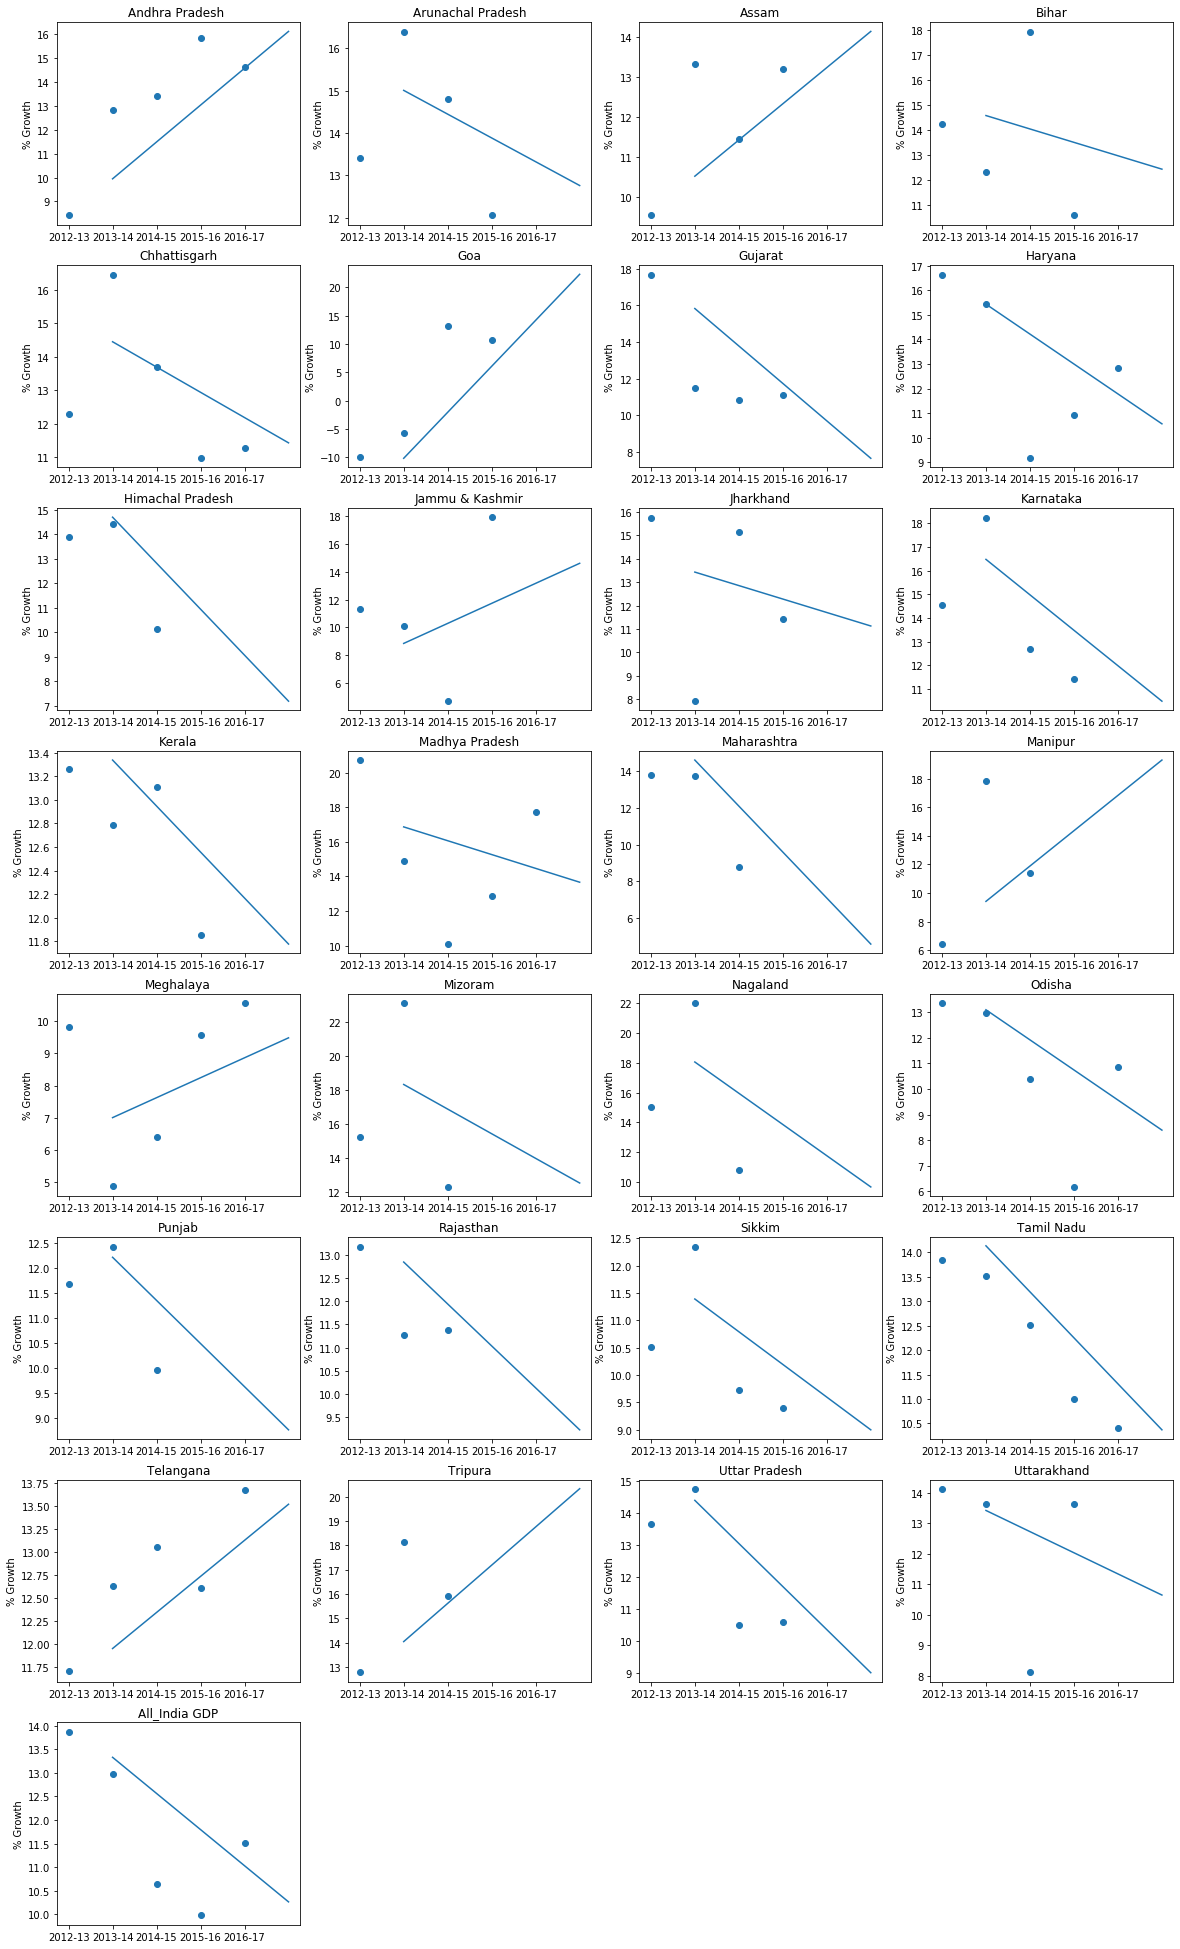

In [108]:
k=0
plt.figure(figsize=(20,35))
for i in range(len(state_list)):    
    k=k+1
    plt.subplot(8, 4,k)
    # Handling the NaN values of the column by using only the finite values
    idx = np.isfinite(df_percent_of_growth['Year']) & np.isfinite(df_percent_of_growth[state_list[i]])
    # Taking slope(M) and Y axis intersection(C)
    m, c = np.polyfit(df_percent_of_growth['Year'][idx],df_percent_of_growth[state_list[i]][idx],1)
    plt.scatter(x='Duration',y=state_list[i],data=df_percent_of_growth)
    plt.plot(df_percent_of_growth['Year'],m*df_percent_of_growth['Year']+c)   
    plt.title(state_list[i])
    plt.ylabel('% Growth')

#### Analysis
We can see from the above state wise percentage of GDP growth over previous year that few states are growing but few are not. The slope of the trend line tells us the growth rate of the states.

Eg:- Telengana GDP growth rate is increasing over the years.

Tamilnadu GDP growth rate is decreasing over the years.

Finally, Overall nation GDP growth rate is decreasing over the years.

In [110]:
# Dropping 'Year' column as we do not need it anymore for further analysis
df_percent_of_growth.drop('Year',axis=1,inplace=True)

In [111]:
# Setting 'Duration' column as index
df_percent_of_growth = df_percent_of_growth.set_index('Duration')
df_percent_of_growth

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
2016-17,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [13]:
# Transposing the dataframe for the readablity.
df_percent_of_growth = df_percent_of_growth.transpose()
df_percent_of_growth

Duration,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,8.43,12.85,13.40,15.85,14.65
Arunachal Pradesh,13.41,16.38,14.79,12.07,NaN
Assam,9.56,13.31,11.45,13.19,NaN
Bihar,14.25,12.30,17.92,10.59,NaN
Chhattisgarh,12.30,16.44,13.69,10.98,11.26
Goa,-10.02,-5.77,13.12,10.75,NaN
Gujarat,17.69,11.47,10.82,11.09,NaN
Haryana,16.63,15.45,9.18,10.91,12.82
Himachal Pradesh,13.89,14.42,10.14,NaN,NaN
Jammu & Kashmir,11.31,10.09,4.70,17.91,NaN


In [14]:
# Adding new column 'Avg. GDP Growth'
df_percent_of_growth['Avg. GDP Growth'] = round(df_percent_of_growth.mean(axis=1),2)
df_percent_of_growth

Duration,2012-13,2013-14,2014-15,2015-16,2016-17,Avg. GDP Growth
Andhra Pradesh,8.43,12.85,13.40,15.85,14.65,13.04
Arunachal Pradesh,13.41,16.38,14.79,12.07,NaN,14.16
Assam,9.56,13.31,11.45,13.19,NaN,11.88
Bihar,14.25,12.30,17.92,10.59,NaN,13.76
Chhattisgarh,12.30,16.44,13.69,10.98,11.26,12.93
Goa,-10.02,-5.77,13.12,10.75,NaN,2.02
Gujarat,17.69,11.47,10.82,11.09,NaN,12.77
Haryana,16.63,15.45,9.18,10.91,12.82,13.00
Himachal Pradesh,13.89,14.42,10.14,NaN,NaN,12.82
Jammu & Kashmir,11.31,10.09,4.70,17.91,NaN,11.00


In [15]:
# Sorting the states by 'Avg. GDP Growth'
df_percent_of_growth = df_percent_of_growth.sort_values(by='Avg. GDP Growth')
df_percent_of_growth

Duration,2012-13,2013-14,2014-15,2015-16,2016-17,Avg. GDP Growth
Goa,-10.02,-5.77,13.12,10.75,NaN,2.02
Meghalaya,9.81,4.87,6.41,9.58,10.55,8.24
Sikkim,10.51,12.35,9.72,9.39,NaN,10.49
Odisha,13.34,12.95,10.37,6.19,10.85,10.74
Jammu & Kashmir,11.31,10.09,4.70,17.91,NaN,11.00
Punjab,11.67,12.42,9.95,NaN,NaN,11.35
All_India GDP,13.86,12.97,10.65,9.99,11.52,11.80
Assam,9.56,13.31,11.45,13.19,NaN,11.88
Manipur,6.45,17.83,11.39,NaN,NaN,11.89
Rajasthan,13.18,11.27,11.37,NaN,NaN,11.94


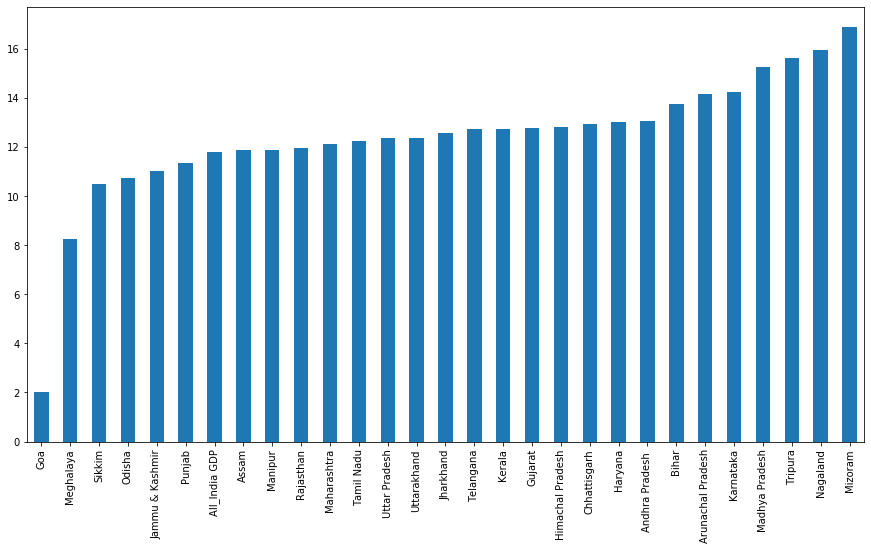

In [16]:
# Plotting 'Avg. GDP Growth' for all the states
plt.figure(figsize=(15,8))
df_percent_of_growth['Avg. GDP Growth'].plot(kind='bar',)
plt.show()

### Answers
#### How will you compare the growth rates of any two states?
The above graph shows the average growth rate of all the states in ascending order. So, we can compare the growth rates of any two states from the above graph.

#### Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states?
`Mizoram` has been growing consistently fast.
`Goa` has been struggling.

**Top 3 fastest growing states:-**
1. Mizoram
2. Nagaland
3. Tripura

**3 slowest growing states:-**
1. Goa
2. Meghalaya
3. Sikkim

#### What is the Nation's average?
Nations average is `11.80`

#### What has been the average growth rate of your home state, and how does it compare to the national average?
My home state is `West Bengal`. Unfortunately the data is not available for my home state in the dataset. 

# Total GDP of the states for the year 2015-16

In [17]:
# Creating dataframe only with GDP of the states for the year 2015-16 
df_GSDP_2015_16 = df_GSDP[(df_GSDP['Duration']=='2015-16') & (df_GSDP['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)')]
df_GSDP_2015_16

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0


In [18]:
# Removing NaN columns
df_GSDP_2015_16 = df_GSDP_2015_16.dropna(axis=1)
df_GSDP_2015_16

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Kerala,Madhya Pradesh,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,588337.0,543975.0,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0,13675331.0


In [19]:
# Removing 'Items Description' column and 'All_India GDP' column as we are comparing only the states, not the entire nation
df_GSDP_2015_16 = df_GSDP_2015_16.drop(['Items  Description','All_India GDP'],axis=1)
df_GSDP_2015_16

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,...,Karnataka,Kerala,Madhya Pradesh,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand
4,2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,118387.0,...,1027068.0,588337.0,543975.0,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0


In [20]:
# Setting 'Duration' column as index
df_GSDP_2015_16 = df_GSDP_2015_16.set_index('Duration')
df_GSDP_2015_16

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand
Duration,,,,,,,,,,,,,,,,,,,,
2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,118387.0,241955.0,1027068.0,588337.0,543975.0,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0


In [21]:
# Transposing the dataframe for better readablity
df_GSDP_2015_16 = df_GSDP_2015_16.T
df_GSDP_2015_16

Duration,2015-16
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0
Assam,224234.0
Bihar,413503.0
Chhattisgarh,260776.0
Goa,45002.0
Gujarat,994316.0
Haryana,485184.0
Jammu & Kashmir,118387.0
Jharkhand,241955.0


In [22]:
# Sorting the states by the GDP
df_GSDP_2015_16 = df_GSDP_2015_16.sort_values(by='2015-16')
df_GSDP_2015_16

Duration,2015-16
Sikkim,16637.0
Arunachal Pradesh,18784.0
Meghalaya,26745.0
Goa,45002.0
Jammu & Kashmir,118387.0
Uttarakhand,184091.0
Assam,224234.0
Jharkhand,241955.0
Chhattisgarh,260776.0
Odisha,341887.0


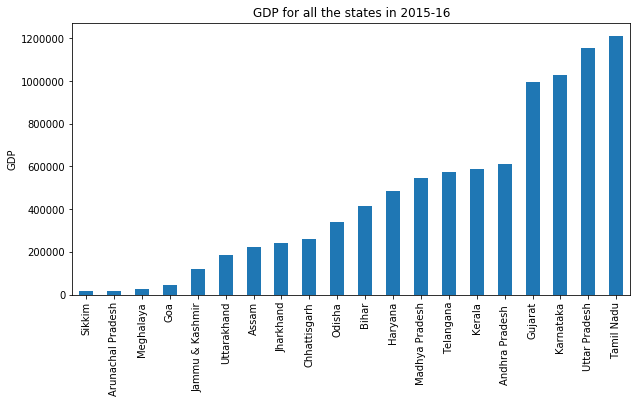

In [23]:
# Plotting GDP for all the states
plt.figure(figsize=(10,5))
df_GSDP_2015_16['2015-16'].plot(kind='bar',)
plt.ylabel('GDP')
plt.title('GDP for all the states in 2015-16')
plt.show()

### Answers

#### Which Plot will you use for this? Why?
It will be more convinient to use bar chart as it dispalys and compares the numbers. Each bar represents individual state and the length of the bar tells us the GDP of the state.

#### Identify the top 5 and the bottom 5 states based on total GDP.
##### Top 5 states:-
1. Tamilnadu
2. Uttar Pradesh
3. Karnataka
4. Gujrat
5. Andhra Pradesh

##### Bottom 5 states:-
1. Sikkim
2. Arunachal Pradesh
3. Meghalaya
4. Goa
5. Jammu & Kashmir

#### What insights can you draw from this graph? What states are performing poorly? (Remember: this will not be solely based on total GDP)
From the 'Avg. GDP growth' graph over four years and from the total GDP of the states grap, we can see that `Goa, Meghalaya and Sikkim` are performing poorly.

# Part I-B: 

In [24]:
# Listing all the CSV files name from GSVA folder. Each CSV file represents GSVA of of each state
file_list = [i for i in glob.glob('GSVA//*.csv')]
file_list

['GSVA\\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Assam-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Bihar-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Chandigarh-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Chhattisgarh-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Delhi-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Goa-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Gujarat-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Haryana-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Jharkhand-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Karnataka-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Kerala-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Maharashtra-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Manipur-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Meghalaya-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Mizoram-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Nagaland-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Odisha-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Puducherry-GSVA_cur_2016-17.csv',
 'GSVA\\NAD

In [25]:
# Removing Union Territories from CSV lists
for i in file_list:
    if 'Puducherry' in i or 'Delhi' in i or 'Chandigarh' in i:
        file_list.remove(i)
file_list

['GSVA\\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Assam-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Bihar-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Chhattisgarh-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Goa-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Gujarat-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Haryana-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Jharkhand-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Karnataka-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Kerala-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Maharashtra-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Manipur-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Meghalaya-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Mizoram-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Nagaland-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Odisha-GSVA_cur_2016-17.csv',
 'GSVA\\NAD-Punjab-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Rajasthan-GSVA_cur_2014-15.csv',
 'GSVA\\NAD-Sikkim-GSVA_cur_2015-16.csv',
 'GSVA\\NAD-Tam

In [26]:
#### Reading GSVA file for each state and concatinating them

df_list = []

for file_name in file_list:
    #Reading each file
    df_GSVA = pd.read_csv(file_name,encoding='latin')
    # Retaining only 2014-15 column
    df_GSVA = df_GSVA.loc[:,['Item','2014-15']]
    # Retaining Sector, Sub-sector, GSDP and Per-capita GSDP rows.
    df_GSVA = df_GSVA[(df_GSVA['Item']=='Agriculture, forestry and fishing') | (df_GSVA['Item']=='Mining and quarrying') | 
        (df_GSVA['Item']=='Primary') | (df_GSVA['Item']=='Manufacturing') |
       (df_GSVA['Item']=='Electricity, gas, water supply & other utility services') | (df_GSVA['Item']=='Construction') |
       (df_GSVA['Item']=='Secondary') | (df_GSVA['Item']=='Trade, repair, hotels and restaurants') |
       (df_GSVA['Item']=='Transport, storage, communication & services related to broadcasting') | (df_GSVA['Item']=='Financial services') |
       (df_GSVA['Item']=='Real estate, ownership of dwelling & professional services') | (df_GSVA['Item']=='Public administration') |
       (df_GSVA['Item']=='Other services') | (df_GSVA['Item']=='Tertiary') |
       (df_GSVA['Item']=='Gross State Domestic Product') | (df_GSVA['Item']=='Population (\'00)') | (df_GSVA['Item']=='Per Capita GSDP (Rs.)')]
    # Dropping S.No. column
    #df_GSVA = df_GSVA.drop('S.No.',axis=1)
    # Transposing the dataframe for better readablity
    df_GSVA = df_GSVA.T
    # Making the 'Item' as column name
    header = df_GSVA.iloc[0]
    df_GSVA = df_GSVA[1:]
    df_GSVA.columns = header
    # Adding 'State' name column        
    df_GSVA['State'] = file_name.split('-')[1]
    # Appending Dataframe to the list
    df_list.append(df_GSVA)

df_GSVA_all_states = pd.concat(df_list,axis=0,ignore_index=True)
df_GSVA_all_states

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State
0,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,1900863,4405409,2200897,4215389,22032942,52646842,501510,104977,Andhra_Pradesh
1,686117,30842,716959,26120,113527,147842,287489,60421,35203,25207,48418,243867,218728,631844,1676119,14870,112718,Arunachal_Pradesh
2,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,543651,1412466,1373611,1795658,9307109,19809800,326780,60621,Assam
3,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,1178022,3740641,2078171,4587589,22179969,37391988,1101240,33954,Bihar
4,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,739057,2462166,867982,1112232,7588778,23498180,270530,86860,Chhattisgarh
5,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,233618,407099,346486,180431,1738217,4063307,14950,271793,Goa
6,1.377e+07,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,3.30235e+07,1.01787e+07,4.55591e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,8.95027e+07,633590,141263,Gujarat
7,8.01524e+06,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,1.25614e+07,4.98632e+06,2.56062e+06,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,4.37462e+07,266620,164077,Haryana
8,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,362521,1125937,553974,923164,4133326,10436879,70840,147330,Himachal_Pradesh
9,3211065,2037289,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091,Jharkhand


In [27]:
# Renaming 'Population (\'00)' to 'Population'
df_GSVA_all_states.rename(columns={'Population (\'00)':'Population'},inplace=True)
df_GSVA_all_states

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),State
0,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,1900863,4405409,2200897,4215389,22032942,52646842,501510,104977,Andhra_Pradesh
1,686117,30842,716959,26120,113527,147842,287489,60421,35203,25207,48418,243867,218728,631844,1676119,14870,112718,Arunachal_Pradesh
2,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,543651,1412466,1373611,1795658,9307109,19809800,326780,60621,Assam
3,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,1178022,3740641,2078171,4587589,22179969,37391988,1101240,33954,Bihar
4,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,739057,2462166,867982,1112232,7588778,23498180,270530,86860,Chhattisgarh
5,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,233618,407099,346486,180431,1738217,4063307,14950,271793,Goa
6,1.377e+07,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,3.30235e+07,1.01787e+07,4.55591e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,8.95027e+07,633590,141263,Gujarat
7,8.01524e+06,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,1.25614e+07,4.98632e+06,2.56062e+06,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,4.37462e+07,266620,164077,Haryana
8,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,362521,1125937,553974,923164,4133326,10436879,70840,147330,Himachal_Pradesh
9,3211065,2037289,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091,Jharkhand


In [28]:
# Moving 'State' column to first column
col_list = df_GSVA_all_states.columns.to_list()
col_list = ['State','Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Primary',
 'Manufacturing',
 'Electricity, gas, water supply & other utility services',
 'Construction',
 'Secondary',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting',
 'Financial services',
 'Real estate, ownership of dwelling & professional services',
 'Public administration',
 'Other services',
 'Tertiary',
 'Gross State Domestic Product',
 'Population',
 'Per Capita GSDP (Rs.)']
df_GSVA_all_states = df_GSVA_all_states.reindex(columns=col_list)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
0,Andhra_Pradesh,14819416,1484300,16303716,4672266,1151729,4664889,10488884,4233400,5076984,1900863,4405409,2200897,4215389,22032942,52646842,501510,104977
1,Arunachal_Pradesh,686117,30842,716959,26120,113527,147842,287489,60421,35203,25207,48418,243867,218728,631844,1676119,14870,112718
2,Assam,3855548,1471149,5326697,2002936,296587,1733568,4033091,2987155,1194568,543651,1412466,1373611,1795658,9307109,19809800,326780,60621
3,Bihar,7951890,68107,8019997,2189965,345168,3449763,5984896,7448373,3147173,1178022,3740641,2078171,4587589,22179969,37391988,1101240,33954
4,Chhattisgarh,3948847,2451970,6400817,4370593,1198438,2669855,8238886,1535571,871770,739057,2462166,867982,1112232,7588778,23498180,270530,86860
5,Goa,308507,3622,312129,1177608,204110,165819,1547536,380927,189656,233618,407099,346486,180431,1738217,4063307,14950,271793
6,Gujarat,1.377e+07,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,3.30235e+07,1.01787e+07,4.55591e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,3.02204e+07,8.95027e+07,633590,141263
7,Haryana,8.01524e+06,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,1.25614e+07,4.98632e+06,2.56062e+06,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,1.92266e+07,4.37462e+07,266620,164077
8,Himachal_Pradesh,1514981,33385,1548366,2543637,767268,808256,4119162,615496,552234,362521,1125937,553974,923164,4133326,10436879,70840,147330
9,Jharkhand,3211065,2037289,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091


In [29]:
# Converting all the columns from object to numeric (except State column) for further numeric calculation

col_list = col_list[1:]
df_GSVA_all_states[col_list] = df_GSVA_all_states[col_list].apply(pd.to_numeric)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
0,Andhra_Pradesh,14819416,1484300.0,16303716,4672266,1151729,4664889,10488884,4233400,5076984,1900863,4405409,2200897,4215389,22032942,52646842,501510,104977
1,Arunachal_Pradesh,686117,30842.0,716959,26120,113527,147842,287489,60421,35203,25207,48418,243867,218728,631844,1676119,14870,112718
2,Assam,3855548,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,1194568,543651,1412466,1373611,1795658,9307109,19809800,326780,60621
3,Bihar,7951890,68107.0,8019997,2189965,345168,3449763,5984896,7448373,3147173,1178022,3740641,2078171,4587589,22179969,37391988,1101240,33954
4,Chhattisgarh,3948847,2451970.0,6400817,4370593,1198438,2669855,8238886,1535571,871770,739057,2462166,867982,1112232,7588778,23498180,270530,86860
5,Goa,308507,3622.0,312129,1177608,204110,165819,1547536,380927,189656,233618,407099,346486,180431,1738217,4063307,14950,271793
6,Gujarat,13769969,2117218.0,15887187,24087538,3409983,5526017,33023538,10178713,4555910,4606644,5179502,2576195,3123413,30220377,89502727,633590,141263
7,Haryana,8015238,25186.0,8040424,7756921,1101919,3702571,12561411,4986319,2560623,1671486,6970183,1036377,2001581,19226568,43746207,266620,164077
8,Himachal_Pradesh,1514981,33385.0,1548366,2543637,767268,808256,4119162,615496,552234,362521,1125937,553974,923164,4133326,10436879,70840,147330
9,Jharkhand,3211065,2037289.0,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091


In [30]:
# Sorting 'df_GSVA_all_states' by 'Per Capita GSDP (Rs.)'
df_GSVA_all_states = df_GSVA_all_states.sort_values(by='Per Capita GSDP (Rs.)')
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
3,Bihar,7951890,68107.0,8019997,2189965,345168,3449763,5984896,7448373,3147173,1178022,3740641,2078171,4587589,22179969,37391988,1101240,33954
26,Uttar_Pradesh,25097754,901501.0,25999255,12261649,2030625,11256450,25548724,9437243,7404509,3392275,14548185,6152124,5034623,45968959,104337115,2109940,49450
14,Manipur,383140,NaN,383140,49501,27490,143182,220173,262950,109726,30315,159335,297078,317930,1177334,1804276,30873,58442
2,Assam,3855548,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,1194568,543651,1412466,1373611,1795658,9307109,19809800,326780,60621
9,Jharkhand,3211065,2037289.0,5248354,4114148,337489,1789834,6241471,1991359,1470022,551441,1656784,1088325,1375410,8133341,21710718,349660,62091
12,Madhya_Pradesh,16235647,1618373.0,17854020,4368833,1272905,4403151,10044889,5357515,2865802,1988794,2660123,2497321,2747805,18117360,48198169,765180,62989
18,Odisha,6422978,2586328.0,9009306,5754229,833067,2402396,8989693,3149555,2034016,1065147,2348714,1318221,2340603,12256258,32197092,435220,73979
15,Meghalaya,366521,84529.0,451050,433213,54473,150256,637942,383974,148189,64091,150409,239782,214211,1200655,2440807,32020,76228
24,Tripura,799825,142391.0,942216,228625,77870,177899,484393,390423,155956,86094,190704,338244,323287,1484709,2966662,38350,77358
20,Rajasthan,15044394,4069385.0,19113780,6552580,1122888,5353326,13028794,7297290,3814461,1827413,6451997,2460364,4164287,26015812,61219447,721610,84837


In [31]:
# GDP per capita for all the states 
# Setting 'State' as index
df_per_capita = df_GSVA_all_states[['State','Per Capita GSDP (Rs.)']]
df_per_capita = df_per_capita.set_index('State')
df_per_capita

Item,Per Capita GSDP (Rs.)
State,
Bihar,33954
Uttar_Pradesh,49450
Manipur,58442
Assam,60621
Jharkhand,62091
Madhya_Pradesh,62989
Odisha,73979
Meghalaya,76228
Tripura,77358


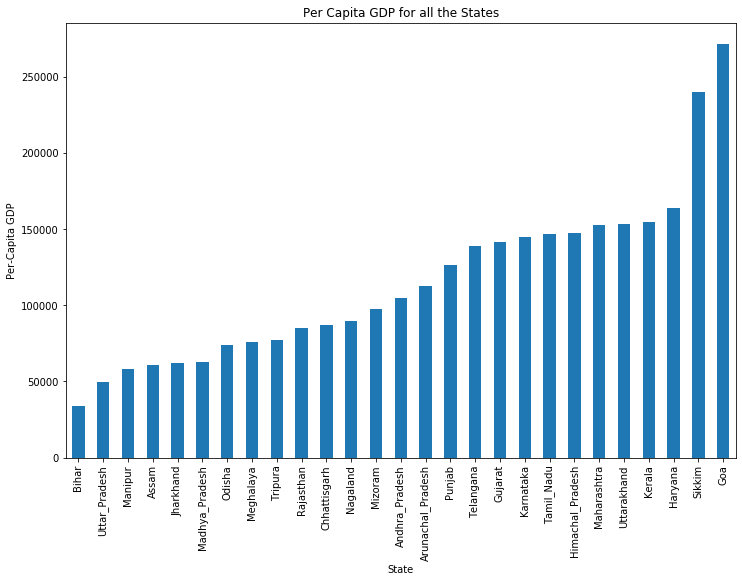

In [32]:
# Plotting per capita for all the states
df_per_capita['Per Capita GSDP (Rs.)'].plot(kind='bar',figsize=(12,8))
plt.ylabel('Per-Capita GDP')
plt.title('Per Capita GDP for all the States')
plt.show()

In [33]:
# Ratio of the highest per capita GDP to the lowest per capita GDP.
round(df_per_capita['Per Capita GSDP (Rs.)'].max()/df_per_capita['Per Capita GSDP (Rs.)'].min(),2)

8.0

### Answers
#### Identify the top 5 and the bottom 5 states based on the GDP per capita.
##### Top 5 states:-
1. Goa
2. Sikkim
3. Haryana
4. Kerala
5. Uttarakhand

##### Bottom 5 states:-
1. Bihar
2. Uttar Pradesh
3. Manipur
4. Assam
5. Jharkhand

#### Find the ratio of the highest per capita GDP to the lowest per capita GDP.
`8.0`

In [34]:
# % contribution of Primary sector to total GDP of the states
df_GSVA_all_states['% Primary contribution'] = round(((df_GSVA_all_states['Primary']/df_GSVA_all_states['Gross State Domestic Product'])*100),2)
df_GSVA_all_states['% Secondary contribution'] = round(((df_GSVA_all_states['Secondary']/df_GSVA_all_states['Gross State Domestic Product'])*100),2)
df_GSVA_all_states['% Tertiary contribution'] = round(((df_GSVA_all_states['Tertiary']/df_GSVA_all_states['Gross State Domestic Product'])*100),2)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution
3,Bihar,7951890,68107.0,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,3740641,2078171,4587589,22179969,37391988,1101240,33954,21.45,16.01,59.32
26,Uttar_Pradesh,25097754,901501.0,25999255,12261649,2030625,11256450,25548724,9437243,7404509,...,14548185,6152124,5034623,45968959,104337115,2109940,49450,24.92,24.49,44.06
14,Manipur,383140,NaN,383140,49501,27490,143182,220173,262950,109726,...,159335,297078,317930,1177334,1804276,30873,58442,21.24,12.20,65.25
2,Assam,3855548,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,1412466,1373611,1795658,9307109,19809800,326780,60621,26.89,20.36,46.98
9,Jharkhand,3211065,2037289.0,5248354,4114148,337489,1789834,6241471,1991359,1470022,...,1656784,1088325,1375410,8133341,21710718,349660,62091,24.17,28.75,37.46
12,Madhya_Pradesh,16235647,1618373.0,17854020,4368833,1272905,4403151,10044889,5357515,2865802,...,2660123,2497321,2747805,18117360,48198169,765180,62989,37.04,20.84,37.59
18,Odisha,6422978,2586328.0,9009306,5754229,833067,2402396,8989693,3149555,2034016,...,2348714,1318221,2340603,12256258,32197092,435220,73979,27.98,27.92,38.07
15,Meghalaya,366521,84529.0,451050,433213,54473,150256,637942,383974,148189,...,150409,239782,214211,1200655,2440807,32020,76228,18.48,26.14,49.19
24,Tripura,799825,142391.0,942216,228625,77870,177899,484393,390423,155956,...,190704,338244,323287,1484709,2966662,38350,77358,31.76,16.33,50.05
20,Rajasthan,15044394,4069385.0,19113780,6552580,1122888,5353326,13028794,7297290,3814461,...,6451997,2460364,4164287,26015812,61219447,721610,84837,31.22,21.28,42.50


In [35]:
# Creating dataframe 'df_sector_contribution'
# and the columns of sector wise percenrage contribution in total GSDP
# Setting 'State' as index
df_sector_contribution = df_GSVA_all_states[['State','% Primary contribution','% Secondary contribution','% Tertiary contribution']] 
df_sector_contribution = df_sector_contribution.set_index('State')
df_sector_contribution

Item,% Primary contribution,% Secondary contribution,% Tertiary contribution
State,,,
Bihar,21.45,16.01,59.32
Uttar_Pradesh,24.92,24.49,44.06
Manipur,21.24,12.20,65.25
Assam,26.89,20.36,46.98
Jharkhand,24.17,28.75,37.46
Madhya_Pradesh,37.04,20.84,37.59
Odisha,27.98,27.92,38.07
Meghalaya,18.48,26.14,49.19
Tripura,31.76,16.33,50.05


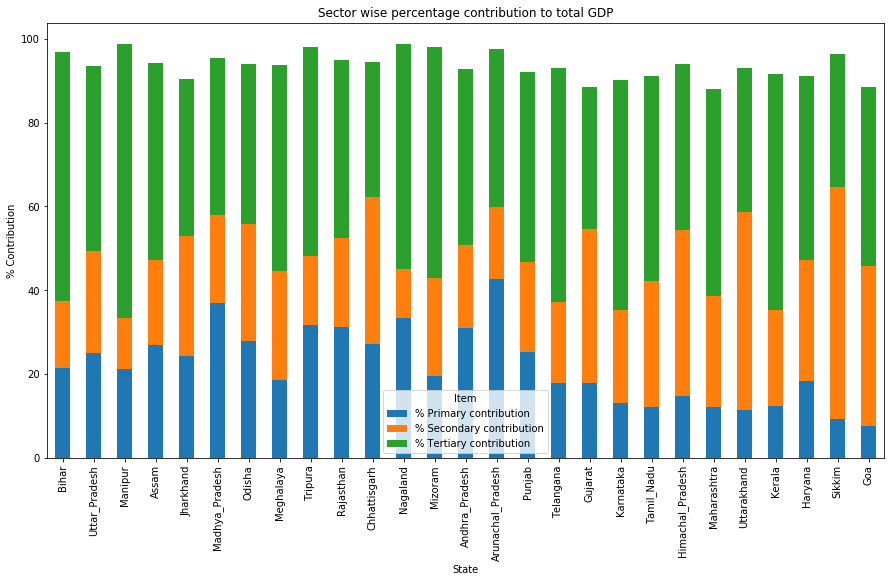

In [36]:
# Plotting sector wise percentage contribution to GSDP for all the states
df_sector_contribution.plot(kind='bar',stacked=True,figsize=(15, 8))
plt.ylabel('% Contribution')
plt.title('Sector wise percentage contribution to total GDP')
plt.show()

In [37]:
# Correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.
# The lowest per capita GDP State Bihar is ranked 1
# The highest per capita GDP state Goa is ranked 27
df_GSVA_all_states['Percentile Rank'] = df_GSVA_all_states['Per Capita GSDP (Rs.)'].rank()
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Public administration,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank
3,Bihar,7951890,68107.0,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,2078171,4587589,22179969,37391988,1101240,33954,21.45,16.01,59.32,1.0
26,Uttar_Pradesh,25097754,901501.0,25999255,12261649,2030625,11256450,25548724,9437243,7404509,...,6152124,5034623,45968959,104337115,2109940,49450,24.92,24.49,44.06,2.0
14,Manipur,383140,NaN,383140,49501,27490,143182,220173,262950,109726,...,297078,317930,1177334,1804276,30873,58442,21.24,12.20,65.25,3.0
2,Assam,3855548,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,1373611,1795658,9307109,19809800,326780,60621,26.89,20.36,46.98,4.0
9,Jharkhand,3211065,2037289.0,5248354,4114148,337489,1789834,6241471,1991359,1470022,...,1088325,1375410,8133341,21710718,349660,62091,24.17,28.75,37.46,5.0
12,Madhya_Pradesh,16235647,1618373.0,17854020,4368833,1272905,4403151,10044889,5357515,2865802,...,2497321,2747805,18117360,48198169,765180,62989,37.04,20.84,37.59,6.0
18,Odisha,6422978,2586328.0,9009306,5754229,833067,2402396,8989693,3149555,2034016,...,1318221,2340603,12256258,32197092,435220,73979,27.98,27.92,38.07,7.0
15,Meghalaya,366521,84529.0,451050,433213,54473,150256,637942,383974,148189,...,239782,214211,1200655,2440807,32020,76228,18.48,26.14,49.19,8.0
24,Tripura,799825,142391.0,942216,228625,77870,177899,484393,390423,155956,...,338244,323287,1484709,2966662,38350,77358,31.76,16.33,50.05,9.0
20,Rajasthan,15044394,4069385.0,19113780,6552580,1122888,5353326,13028794,7297290,3814461,...,2460364,4164287,26015812,61219447,721610,84837,31.22,21.28,42.50,10.0


In [38]:
# Correlation in 'Pearson' method
df_corr_rank_primary = df_GSVA_all_states[['% Primary contribution','Percentile Rank']]
df_corr_rank_primary.corr(method ='pearson')

Item,% Primary contribution,Percentile Rank
Item,,
% Primary contribution,1.000000,-0.620089
Percentile Rank,-0.620089,1.000000


### Answers
#### Which plot will you use here? Why?
We can use stacked bar graph beacuse it is used to show comparisions between categories of data.
#### Why is (Primary + Secondary + Tertiary) not equal to total GDP?
Total GDP = (Primary + Secondary + Tertiary)+(Taxes on Products)-(Subsidies on products)

Eg.:- For the year of 2014-15 the Total GDP of Andhra Pradesh-

52646842=(16303716+10488884+22032942)+(5512100)-(1690800)

#### Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.
There is a negative correlation between 'the rank of the states based of their per capita GDP' and 'primary sector contribution to the GDP'.

Correlation = `-.62`

Insights we can draw:- 
1. The higher the per capita GDP of the states, the lesser those states are dependent on primary sector.
2. The lower the per capita GDP of the states, the higher those states are dependent on primary sector.

#### Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [39]:
# Taking the quantile values for each category
val_C1 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([1]).values
val_C2 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([.85]).values
val_C3 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([.50]).values
val_C4 = df_GSVA_all_states['Per Capita GSDP (Rs.)'].quantile([.20]).values
print(val_C1)
print(val_C2)
print(val_C3)
print(val_C4)

[271793.]
[153246.2]
[104977.]
[65187.]


In [40]:
# Defining a function for categorizing the states
def state_category(x):
    if ((x>=0) and (x<val_C4)):
        return 'C4'
    elif ((x>=val_C4) and (x<val_C3)):
        return 'C3'
    elif ((x>=val_C3) and (x<val_C2)):
        return 'C2'
    else:
        return 'C1'

In [41]:
# Creating 'Category' column
# Applying the above 'state_category' function to 'Per Capita GSDP (Rs.)' column
df_GSVA_all_states['Category'] = df_GSVA_all_states['Per Capita GSDP (Rs.)'].apply(state_category)
df_GSVA_all_states

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Other services,Tertiary,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank,Category
3,Bihar,7951890,68107.0,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,4587589,22179969,37391988,1101240,33954,21.45,16.01,59.32,1.0,C4
26,Uttar_Pradesh,25097754,901501.0,25999255,12261649,2030625,11256450,25548724,9437243,7404509,...,5034623,45968959,104337115,2109940,49450,24.92,24.49,44.06,2.0,C4
14,Manipur,383140,NaN,383140,49501,27490,143182,220173,262950,109726,...,317930,1177334,1804276,30873,58442,21.24,12.20,65.25,3.0,C4
2,Assam,3855548,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,1795658,9307109,19809800,326780,60621,26.89,20.36,46.98,4.0,C4
9,Jharkhand,3211065,2037289.0,5248354,4114148,337489,1789834,6241471,1991359,1470022,...,1375410,8133341,21710718,349660,62091,24.17,28.75,37.46,5.0,C4
12,Madhya_Pradesh,16235647,1618373.0,17854020,4368833,1272905,4403151,10044889,5357515,2865802,...,2747805,18117360,48198169,765180,62989,37.04,20.84,37.59,6.0,C4
18,Odisha,6422978,2586328.0,9009306,5754229,833067,2402396,8989693,3149555,2034016,...,2340603,12256258,32197092,435220,73979,27.98,27.92,38.07,7.0,C3
15,Meghalaya,366521,84529.0,451050,433213,54473,150256,637942,383974,148189,...,214211,1200655,2440807,32020,76228,18.48,26.14,49.19,8.0,C3
24,Tripura,799825,142391.0,942216,228625,77870,177899,484393,390423,155956,...,323287,1484709,2966662,38350,77358,31.76,16.33,50.05,9.0,C3
20,Rajasthan,15044394,4069385.0,19113780,6552580,1122888,5353326,13028794,7297290,3814461,...,4164287,26015812,61219447,721610,84837,31.22,21.28,42.50,10.0,C3


#### Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

### C1 states

In [42]:
# Creating dataframe for C1 states
# Taking only sub sectors columns and total GSDP
df_state_C1 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C1']
df_state_C1 = df_state_C1[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C1

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
11,Kerala,5930617,558824.0,4273567,482470,7314003,8557345,4020934,2010306,7287633,2068915,5728645,52600230
7,Haryana,8015238,25186.0,7756921,1101919,3702571,4986319,2560623,1671486,6970183,1036377,2001581,43746207
21,Sikkim,137447,1329.0,550697,212499,82058,70568,47347,21079,75330,119514,149265,1520933
5,Goa,308507,3622.0,1177608,204110,165819,380927,189656,233618,407099,346486,180431,4063307


In [43]:
# Transposing 'df_state_C1'
df_state_C1 = df_state_C1.T
df_state_C1

,11,7,21,5
Item,,,,
State,Kerala,Haryana,Sikkim,Goa
"Agriculture, forestry and fishing",5930617,8015238,137447,308507
Mining and quarrying,558824,25186,1329,3622
Manufacturing,4273567,7756921,550697,1177608
"Electricity, gas, water supply & other utility services",482470,1101919,212499,204110
Construction,7314003,3702571,82058,165819
"Trade, repair, hotels and restaurants",8557345,4986319,70568,380927
"Transport, storage, communication & services related to broadcasting",4020934,2560623,47347,189656
Financial services,2010306,1671486,21079,233618


In [44]:
# Creating column header with States name
header = df_state_C1.iloc[0]
df_state_C1 = df_state_C1[1:]
df_state_C1.columns = header
df_state_C1

State,Kerala,Haryana,Sikkim,Goa
Item,,,,
"Agriculture, forestry and fishing",5930617,8015238,137447,308507
Mining and quarrying,558824,25186,1329,3622
Manufacturing,4273567,7756921,550697,1177608
"Electricity, gas, water supply & other utility services",482470,1101919,212499,204110
Construction,7314003,3702571,82058,165819
"Trade, repair, hotels and restaurants",8557345,4986319,70568,380927
"Transport, storage, communication & services related to broadcasting",4020934,2560623,47347,189656
Financial services,2010306,1671486,21079,233618
"Real estate, ownership of dwelling & professional services",7287633,6970183,75330,407099


In [45]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C1['Total'] = df_state_C1['Kerala']+df_state_C1['Haryana']+df_state_C1['Sikkim']+df_state_C1['Goa']
df_state_C1

State,Kerala,Haryana,Sikkim,Goa,Total
Item,,,,,
"Agriculture, forestry and fishing",5930617,8015238,137447,308507,14391809
Mining and quarrying,558824,25186,1329,3622,588961
Manufacturing,4273567,7756921,550697,1177608,13758793
"Electricity, gas, water supply & other utility services",482470,1101919,212499,204110,2000998
Construction,7314003,3702571,82058,165819,11264451
"Trade, repair, hotels and restaurants",8557345,4986319,70568,380927,13995159
"Transport, storage, communication & services related to broadcasting",4020934,2560623,47347,189656,6818560
Financial services,2010306,1671486,21079,233618,3936489
"Real estate, ownership of dwelling & professional services",7287633,6970183,75330,407099,14740245


In [46]:
# Converting all the columns data type to numeric
df_state_C1[df_state_C1.columns] = df_state_C1[df_state_C1.columns].apply(pd.to_numeric)

In [47]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C1['% Sub Sector Contribution'] = round(((df_state_C1['Total']/df_state_C1.at['Gross State Domestic Product','Total'])*100),2)
df_state_C1

State,Kerala,Haryana,Sikkim,Goa,Total,% Sub Sector Contribution
Item,,,,,,
"Agriculture, forestry and fishing",5930617,8015238,137447,308507,14391809,14.12
Mining and quarrying,558824,25186,1329,3622,588961,0.58
Manufacturing,4273567,7756921,550697,1177608,13758793,13.50
"Electricity, gas, water supply & other utility services",482470,1101919,212499,204110,2000998,1.96
Construction,7314003,3702571,82058,165819,11264451,11.05
"Trade, repair, hotels and restaurants",8557345,4986319,70568,380927,13995159,13.73
"Transport, storage, communication & services related to broadcasting",4020934,2560623,47347,189656,6818560,6.69
Financial services,2010306,1671486,21079,233618,3936489,3.86
"Real estate, ownership of dwelling & professional services",7287633,6970183,75330,407099,14740245,14.46


In [48]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C1 = df_state_C1.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C1 = df_state_C1.drop('Gross State Domestic Product')
df_state_C1

State,Kerala,Haryana,Sikkim,Goa,Total,% Sub Sector Contribution
Item,,,,,,
"Real estate, ownership of dwelling & professional services",7287633,6970183,75330,407099,14740245,14.46
"Agriculture, forestry and fishing",5930617,8015238,137447,308507,14391809,14.12
"Trade, repair, hotels and restaurants",8557345,4986319,70568,380927,13995159,13.73
Manufacturing,4273567,7756921,550697,1177608,13758793,13.50
Construction,7314003,3702571,82058,165819,11264451,11.05
Other services,5728645,2001581,149265,180431,8059922,7.91
"Transport, storage, communication & services related to broadcasting",4020934,2560623,47347,189656,6818560,6.69
Financial services,2010306,1671486,21079,233618,3936489,3.86
Public administration,2068915,1036377,119514,346486,3571292,3.50


In [49]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C1['Top 80%'] = df_state_C1['% Sub Sector Contribution'].cumsum()
df_state_C1

State,Kerala,Haryana,Sikkim,Goa,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,
"Real estate, ownership of dwelling & professional services",7287633,6970183,75330,407099,14740245,14.46,14.46
"Agriculture, forestry and fishing",5930617,8015238,137447,308507,14391809,14.12,28.58
"Trade, repair, hotels and restaurants",8557345,4986319,70568,380927,13995159,13.73,42.31
Manufacturing,4273567,7756921,550697,1177608,13758793,13.50,55.81
Construction,7314003,3702571,82058,165819,11264451,11.05,66.86
Other services,5728645,2001581,149265,180431,8059922,7.91,74.77
"Transport, storage, communication & services related to broadcasting",4020934,2560623,47347,189656,6818560,6.69,81.46
Financial services,2010306,1671486,21079,233618,3936489,3.86,85.32
Public administration,2068915,1036377,119514,346486,3571292,3.50,88.82


In [50]:
# Filtering the sub sectors, which contribute more than 80%
# Please note 'Transport, storage, communication & services related to broadcasting' sub sector is also included 
# because it is just above 80%
df_state_C1 = df_state_C1[df_state_C1['Top 80%'] < 82]
df_state_C1

State,Kerala,Haryana,Sikkim,Goa,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,
"Real estate, ownership of dwelling & professional services",7287633,6970183,75330,407099,14740245,14.46,14.46
"Agriculture, forestry and fishing",5930617,8015238,137447,308507,14391809,14.12,28.58
"Trade, repair, hotels and restaurants",8557345,4986319,70568,380927,13995159,13.73,42.31
Manufacturing,4273567,7756921,550697,1177608,13758793,13.50,55.81
Construction,7314003,3702571,82058,165819,11264451,11.05,66.86
Other services,5728645,2001581,149265,180431,8059922,7.91,74.77
"Transport, storage, communication & services related to broadcasting",4020934,2560623,47347,189656,6818560,6.69,81.46


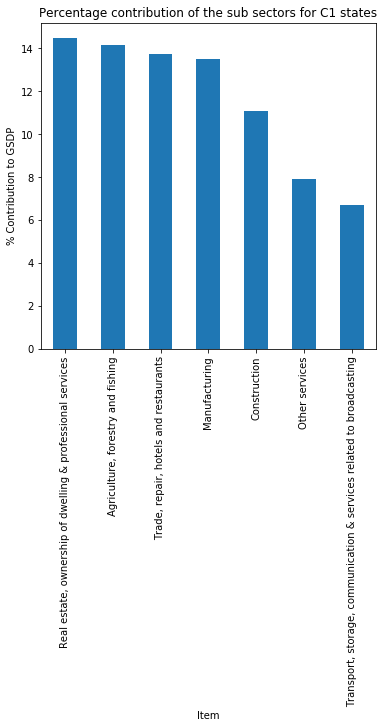

In [51]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C1 category states
df_state_C1['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C1 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C1 category.
1. Real estate, ownership of dwelling & professional services
2. Agriculture, forestry and fishing
3. Trade, repair, hotels and restaurants
4. Manufacturing
5. Construction

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Other services
2. Transport, storage, communication & services related to broadcasting

### C2 states

In [52]:
# Creating dataframe for C2 states
# Taking only sub sectors columns and total GSDP
df_state_C2 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C2']
df_state_C2 = df_state_C2[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C2

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
0,Andhra_Pradesh,14819416,1484300.0,4672266,1151729,4664889,4233400,5076984,1900863,4405409,2200897,4215389,52646842
1,Arunachal_Pradesh,686117,30842.0,26120,113527,147842,60421,35203,25207,48418,243867,218728,1676119
19,Punjab,9285716,10354.0,4790341,911611,2202962,4419919,1951809,2057520,3142786,1842730,3303041,36801089
23,Telangana,7591501,1541853.0,6353711,716266,2854024,6494607,3604741,3023729,9478839,1711265,4158229,51117765
6,Gujarat,13769969,2117218.0,24087538,3409983,5526017,10178713,4555910,4606644,5179502,2576195,3123413,89502727
10,Karnataka,11219422,846882.0,12953843,1425762,6104799,8991658,5097652,4094169,24766393,2232584,5308174,92178806
22,Tamil_Nadu,13064238,265536.0,18914794,1710379,12216718,12895842,7188320,5598498,16830213,3400800,7430115,109256373
8,Himachal_Pradesh,1514981,33385.0,2543637,767268,808256,615496,552234,362521,1125937,553974,923164,10436879
13,Maharashtra,16475655,5282727.0,33660294,4334702,9450211,15839100,9697246,16143324,30718051,5426991,10806363,179212165
25,Uttarakhand,1601423,244549.0,5866252,433880,1342733,1743106,1066693,385030,831307,579409,982430,16198529


In [53]:
# Transposing 'df_state_C2'
df_state_C2 = df_state_C2.T
df_state_C2

,0,1,19,23,6,10,22,8,13,25
Item,,,,,,,,,,
State,Andhra_Pradesh,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand
"Agriculture, forestry and fishing",14819416,686117,9285716,7591501,13769969,11219422,13064238,1514981,16475655,1601423
Mining and quarrying,1.4843e+06,30842,10354,1.54185e+06,2.11722e+06,846882,265536,33385,5.28273e+06,244549
Manufacturing,4672266,26120,4790341,6353711,24087538,12953843,18914794,2543637,33660294,5866252
"Electricity, gas, water supply & other utility services",1151729,113527,911611,716266,3409983,1425762,1710379,767268,4334702,433880
Construction,4664889,147842,2202962,2854024,5526017,6104799,12216718,808256,9450211,1342733
"Trade, repair, hotels and restaurants",4233400,60421,4419919,6494607,10178713,8991658,12895842,615496,15839100,1743106
"Transport, storage, communication & services related to broadcasting",5076984,35203,1951809,3604741,4555910,5097652,7188320,552234,9697246,1066693
Financial services,1900863,25207,2057520,3023729,4606644,4094169,5598498,362521,16143324,385030


In [54]:
# Creating column header with States name
header = df_state_C2.iloc[0]
df_state_C2 = df_state_C2[1:]
df_state_C2.columns = header
df_state_C2

State,Andhra_Pradesh,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand
Item,,,,,,,,,,
"Agriculture, forestry and fishing",14819416,686117,9285716,7591501,13769969,11219422,13064238,1514981,16475655,1601423
Mining and quarrying,1.4843e+06,30842,10354,1.54185e+06,2.11722e+06,846882,265536,33385,5.28273e+06,244549
Manufacturing,4672266,26120,4790341,6353711,24087538,12953843,18914794,2543637,33660294,5866252
"Electricity, gas, water supply & other utility services",1151729,113527,911611,716266,3409983,1425762,1710379,767268,4334702,433880
Construction,4664889,147842,2202962,2854024,5526017,6104799,12216718,808256,9450211,1342733
"Trade, repair, hotels and restaurants",4233400,60421,4419919,6494607,10178713,8991658,12895842,615496,15839100,1743106
"Transport, storage, communication & services related to broadcasting",5076984,35203,1951809,3604741,4555910,5097652,7188320,552234,9697246,1066693
Financial services,1900863,25207,2057520,3023729,4606644,4094169,5598498,362521,16143324,385030
"Real estate, ownership of dwelling & professional services",4405409,48418,3142786,9478839,5179502,24766393,16830213,1125937,30718051,831307


In [55]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C2['Total'] = df_state_C2['Andhra_Pradesh']+df_state_C2['Arunachal_Pradesh']+df_state_C2['Punjab']+df_state_C2['Telangana']+df_state_C2['Gujarat']+df_state_C2['Karnataka']+df_state_C2['Tamil_Nadu']+df_state_C2['Himachal_Pradesh']+df_state_C2['Maharashtra']+df_state_C2['Uttarakhand']
df_state_C2

State,Andhra_Pradesh,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total
Item,,,,,,,,,,,
"Agriculture, forestry and fishing",14819416,686117,9285716,7591501,13769969,11219422,13064238,1514981,16475655,1601423,90028438
Mining and quarrying,1.4843e+06,30842,10354,1.54185e+06,2.11722e+06,846882,265536,33385,5.28273e+06,244549,1.18576e+07
Manufacturing,4672266,26120,4790341,6353711,24087538,12953843,18914794,2543637,33660294,5866252,113868796
"Electricity, gas, water supply & other utility services",1151729,113527,911611,716266,3409983,1425762,1710379,767268,4334702,433880,14975107
Construction,4664889,147842,2202962,2854024,5526017,6104799,12216718,808256,9450211,1342733,45318451
"Trade, repair, hotels and restaurants",4233400,60421,4419919,6494607,10178713,8991658,12895842,615496,15839100,1743106,65472262
"Transport, storage, communication & services related to broadcasting",5076984,35203,1951809,3604741,4555910,5097652,7188320,552234,9697246,1066693,38826792
Financial services,1900863,25207,2057520,3023729,4606644,4094169,5598498,362521,16143324,385030,38197505
"Real estate, ownership of dwelling & professional services",4405409,48418,3142786,9478839,5179502,24766393,16830213,1125937,30718051,831307,96526855


In [56]:
# Converting all the columns data type to numeric
df_state_C2[df_state_C2.columns] = df_state_C2[df_state_C2.columns].apply(pd.to_numeric)

In [57]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C2['% Sub Sector Contribution'] = round(((df_state_C2['Total']/df_state_C2.at['Gross State Domestic Product','Total'])*100),2)
df_state_C2

State,Andhra_Pradesh,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution
Item,,,,,,,,,,,,
"Agriculture, forestry and fishing",14819416,686117,9285716,7591501,13769969,11219422,13064238,1514981,16475655,1601423,90028438,14.09
Mining and quarrying,1484300,30842,10354,1541853,2117218,846882,265536,33385,5282727,244549,11857646,1.86
Manufacturing,4672266,26120,4790341,6353711,24087538,12953843,18914794,2543637,33660294,5866252,113868796,17.82
"Electricity, gas, water supply & other utility services",1151729,113527,911611,716266,3409983,1425762,1710379,767268,4334702,433880,14975107,2.34
Construction,4664889,147842,2202962,2854024,5526017,6104799,12216718,808256,9450211,1342733,45318451,7.09
"Trade, repair, hotels and restaurants",4233400,60421,4419919,6494607,10178713,8991658,12895842,615496,15839100,1743106,65472262,10.25
"Transport, storage, communication & services related to broadcasting",5076984,35203,1951809,3604741,4555910,5097652,7188320,552234,9697246,1066693,38826792,6.08
Financial services,1900863,25207,2057520,3023729,4606644,4094169,5598498,362521,16143324,385030,38197505,5.98
"Real estate, ownership of dwelling & professional services",4405409,48418,3142786,9478839,5179502,24766393,16830213,1125937,30718051,831307,96526855,15.11


In [58]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C2 = df_state_C2.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C2 = df_state_C2.drop('Gross State Domestic Product')
df_state_C2

State,Andhra_Pradesh,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution
Item,,,,,,,,,,,,
Manufacturing,4672266,26120,4790341,6353711,24087538,12953843,18914794,2543637,33660294,5866252,113868796,17.82
"Real estate, ownership of dwelling & professional services",4405409,48418,3142786,9478839,5179502,24766393,16830213,1125937,30718051,831307,96526855,15.11
"Agriculture, forestry and fishing",14819416,686117,9285716,7591501,13769969,11219422,13064238,1514981,16475655,1601423,90028438,14.09
"Trade, repair, hotels and restaurants",4233400,60421,4419919,6494607,10178713,8991658,12895842,615496,15839100,1743106,65472262,10.25
Construction,4664889,147842,2202962,2854024,5526017,6104799,12216718,808256,9450211,1342733,45318451,7.09
Other services,4215389,218728,3303041,4158229,3123413,5308174,7430115,923164,10806363,982430,40469046,6.33
"Transport, storage, communication & services related to broadcasting",5076984,35203,1951809,3604741,4555910,5097652,7188320,552234,9697246,1066693,38826792,6.08
Financial services,1900863,25207,2057520,3023729,4606644,4094169,5598498,362521,16143324,385030,38197505,5.98
Public administration,2200897,243867,1842730,1711265,2576195,2232584,3400800,553974,5426991,579409,20768712,3.25


In [59]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C2['Top 80%'] = df_state_C2['% Sub Sector Contribution'].cumsum()
df_state_C2

State,Andhra_Pradesh,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,,,,
Manufacturing,4672266,26120,4790341,6353711,24087538,12953843,18914794,2543637,33660294,5866252,113868796,17.82,17.82
"Real estate, ownership of dwelling & professional services",4405409,48418,3142786,9478839,5179502,24766393,16830213,1125937,30718051,831307,96526855,15.11,32.93
"Agriculture, forestry and fishing",14819416,686117,9285716,7591501,13769969,11219422,13064238,1514981,16475655,1601423,90028438,14.09,47.02
"Trade, repair, hotels and restaurants",4233400,60421,4419919,6494607,10178713,8991658,12895842,615496,15839100,1743106,65472262,10.25,57.27
Construction,4664889,147842,2202962,2854024,5526017,6104799,12216718,808256,9450211,1342733,45318451,7.09,64.36
Other services,4215389,218728,3303041,4158229,3123413,5308174,7430115,923164,10806363,982430,40469046,6.33,70.69
"Transport, storage, communication & services related to broadcasting",5076984,35203,1951809,3604741,4555910,5097652,7188320,552234,9697246,1066693,38826792,6.08,76.77
Financial services,1900863,25207,2057520,3023729,4606644,4094169,5598498,362521,16143324,385030,38197505,5.98,82.75
Public administration,2200897,243867,1842730,1711265,2576195,2232584,3400800,553974,5426991,579409,20768712,3.25,86.00


In [60]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C2 = df_state_C2[df_state_C2['Top 80%'] < 80]
df_state_C2

State,Andhra_Pradesh,Arunachal_Pradesh,Punjab,Telangana,Gujarat,Karnataka,Tamil_Nadu,Himachal_Pradesh,Maharashtra,Uttarakhand,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,,,,
Manufacturing,4672266,26120,4790341,6353711,24087538,12953843,18914794,2543637,33660294,5866252,113868796,17.82,17.82
"Real estate, ownership of dwelling & professional services",4405409,48418,3142786,9478839,5179502,24766393,16830213,1125937,30718051,831307,96526855,15.11,32.93
"Agriculture, forestry and fishing",14819416,686117,9285716,7591501,13769969,11219422,13064238,1514981,16475655,1601423,90028438,14.09,47.02
"Trade, repair, hotels and restaurants",4233400,60421,4419919,6494607,10178713,8991658,12895842,615496,15839100,1743106,65472262,10.25,57.27
Construction,4664889,147842,2202962,2854024,5526017,6104799,12216718,808256,9450211,1342733,45318451,7.09,64.36
Other services,4215389,218728,3303041,4158229,3123413,5308174,7430115,923164,10806363,982430,40469046,6.33,70.69
"Transport, storage, communication & services related to broadcasting",5076984,35203,1951809,3604741,4555910,5097652,7188320,552234,9697246,1066693,38826792,6.08,76.77


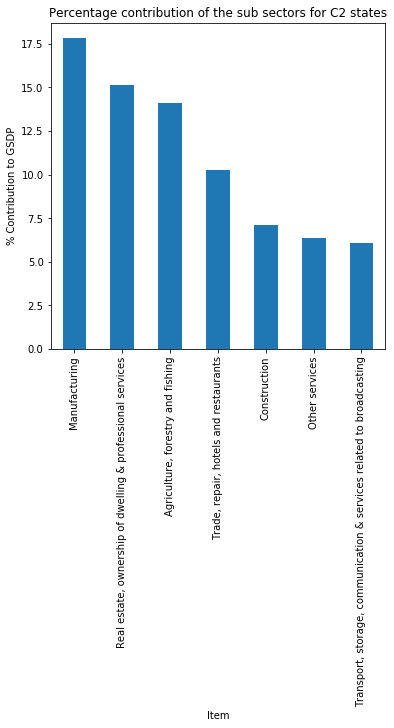

In [61]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C2 category states
df_state_C2['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C2 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C2 category.
1. Manufacturing
2. Real estate, ownership of dwelling & professional services
3. Agriculture, forestry and fishing
4. Trade, repair, hotels and restaurants
5. Construction

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Construction
2. Other services
3. Transport, storage, communication & services related to broadcasting

### C3 states

In [62]:
# Creating dataframe for C3 states
# Taking only sub sectors columns and total GSDP
df_state_C3 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C3']
df_state_C3 = df_state_C3[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C3

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
18,Odisha,6422978,2586328.0,5754229,833067,2402396,3149555,2034016,1065147,2348714,1318221,2340603,32197092
15,Meghalaya,366521,84529.0,433213,54473,150256,383974,148189,64091,150409,239782,214211,2440807
24,Tripura,799825,142391.0,228625,77870,177899,390423,155956,86094,190704,338244,323287,2966662
20,Rajasthan,15044394,4069385.0,6552580,1122888,5353326,7297290,3814461,1827413,6451997,2460364,4164287,61219447
4,Chhattisgarh,3948847,2451970.0,4370593,1198438,2669855,1535571,871770,739057,2462166,867982,1112232,23498180
17,Nagaland,607897,8280.0,18346,37944,156072,140781,77521,60393,159651,295424,259186,1841424
16,Mizoram,217010,8588.0,8479,128365,133228,114315,52587,23168,55068,206259,186222,1155933


In [63]:
# Transposing 'df_state_C3'
df_state_C3 = df_state_C3.T
df_state_C3

,18,15,24,20,4,17,16
Item,,,,,,,
State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram
"Agriculture, forestry and fishing",6422978,366521,799825,15044394,3948847,607897,217010
Mining and quarrying,2.58633e+06,84529,142391,4.06938e+06,2.45197e+06,8280,8588
Manufacturing,5754229,433213,228625,6552580,4370593,18346,8479
"Electricity, gas, water supply & other utility services",833067,54473,77870,1122888,1198438,37944,128365
Construction,2402396,150256,177899,5353326,2669855,156072,133228
"Trade, repair, hotels and restaurants",3149555,383974,390423,7297290,1535571,140781,114315
"Transport, storage, communication & services related to broadcasting",2034016,148189,155956,3814461,871770,77521,52587
Financial services,1065147,64091,86094,1827413,739057,60393,23168


In [64]:
# Creating column header with States name
header = df_state_C3.iloc[0]
df_state_C3 = df_state_C3[1:]
df_state_C3.columns = header
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram
Item,,,,,,,
"Agriculture, forestry and fishing",6422978,366521,799825,15044394,3948847,607897,217010
Mining and quarrying,2.58633e+06,84529,142391,4.06938e+06,2.45197e+06,8280,8588
Manufacturing,5754229,433213,228625,6552580,4370593,18346,8479
"Electricity, gas, water supply & other utility services",833067,54473,77870,1122888,1198438,37944,128365
Construction,2402396,150256,177899,5353326,2669855,156072,133228
"Trade, repair, hotels and restaurants",3149555,383974,390423,7297290,1535571,140781,114315
"Transport, storage, communication & services related to broadcasting",2034016,148189,155956,3814461,871770,77521,52587
Financial services,1065147,64091,86094,1827413,739057,60393,23168
"Real estate, ownership of dwelling & professional services",2348714,150409,190704,6451997,2462166,159651,55068


In [65]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C3['Total'] = df_state_C3['Odisha']+df_state_C3['Meghalaya']+df_state_C3['Tripura']+df_state_C3['Rajasthan']+df_state_C3['Chhattisgarh']+df_state_C3['Nagaland']+df_state_C3['Mizoram']
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Total
Item,,,,,,,,
"Agriculture, forestry and fishing",6422978,366521,799825,15044394,3948847,607897,217010,27407472
Mining and quarrying,2.58633e+06,84529,142391,4.06938e+06,2.45197e+06,8280,8588,9.35147e+06
Manufacturing,5754229,433213,228625,6552580,4370593,18346,8479,17366065
"Electricity, gas, water supply & other utility services",833067,54473,77870,1122888,1198438,37944,128365,3453045
Construction,2402396,150256,177899,5353326,2669855,156072,133228,11043032
"Trade, repair, hotels and restaurants",3149555,383974,390423,7297290,1535571,140781,114315,13011909
"Transport, storage, communication & services related to broadcasting",2034016,148189,155956,3814461,871770,77521,52587,7154500
Financial services,1065147,64091,86094,1827413,739057,60393,23168,3865363
"Real estate, ownership of dwelling & professional services",2348714,150409,190704,6451997,2462166,159651,55068,11818709


In [66]:
# Converting all the columns data type to numeric
df_state_C3[df_state_C3.columns] = df_state_C3[df_state_C3.columns].apply(pd.to_numeric)

In [67]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C3['% Sub Sector Contribution'] = round(((df_state_C3['Total']/df_state_C3.at['Gross State Domestic Product','Total'])*100),2)
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Total,% Sub Sector Contribution
Item,,,,,,,,,
"Agriculture, forestry and fishing",6422978,366521,799825,15044394,3948847,607897,217010,27407472,21.87
Mining and quarrying,2586328,84529,142391,4069385,2451970,8280,8588,9351471,7.46
Manufacturing,5754229,433213,228625,6552580,4370593,18346,8479,17366065,13.86
"Electricity, gas, water supply & other utility services",833067,54473,77870,1122888,1198438,37944,128365,3453045,2.76
Construction,2402396,150256,177899,5353326,2669855,156072,133228,11043032,8.81
"Trade, repair, hotels and restaurants",3149555,383974,390423,7297290,1535571,140781,114315,13011909,10.38
"Transport, storage, communication & services related to broadcasting",2034016,148189,155956,3814461,871770,77521,52587,7154500,5.71
Financial services,1065147,64091,86094,1827413,739057,60393,23168,3865363,3.08
"Real estate, ownership of dwelling & professional services",2348714,150409,190704,6451997,2462166,159651,55068,11818709,9.43


In [68]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C3 = df_state_C3.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C3 = df_state_C3.drop('Gross State Domestic Product')
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Total,% Sub Sector Contribution
Item,,,,,,,,,
"Agriculture, forestry and fishing",6422978,366521,799825,15044394,3948847,607897,217010,27407472,21.87
Manufacturing,5754229,433213,228625,6552580,4370593,18346,8479,17366065,13.86
"Trade, repair, hotels and restaurants",3149555,383974,390423,7297290,1535571,140781,114315,13011909,10.38
"Real estate, ownership of dwelling & professional services",2348714,150409,190704,6451997,2462166,159651,55068,11818709,9.43
Construction,2402396,150256,177899,5353326,2669855,156072,133228,11043032,8.81
Mining and quarrying,2586328,84529,142391,4069385,2451970,8280,8588,9351471,7.46
Other services,2340603,214211,323287,4164287,1112232,259186,186222,8600028,6.86
"Transport, storage, communication & services related to broadcasting",2034016,148189,155956,3814461,871770,77521,52587,7154500,5.71
Public administration,1318221,239782,338244,2460364,867982,295424,206259,5726276,4.57


In [69]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C3['Top 80%'] = df_state_C3['% Sub Sector Contribution'].cumsum()
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,
"Agriculture, forestry and fishing",6422978,366521,799825,15044394,3948847,607897,217010,27407472,21.87,21.87
Manufacturing,5754229,433213,228625,6552580,4370593,18346,8479,17366065,13.86,35.73
"Trade, repair, hotels and restaurants",3149555,383974,390423,7297290,1535571,140781,114315,13011909,10.38,46.11
"Real estate, ownership of dwelling & professional services",2348714,150409,190704,6451997,2462166,159651,55068,11818709,9.43,55.54
Construction,2402396,150256,177899,5353326,2669855,156072,133228,11043032,8.81,64.35
Mining and quarrying,2586328,84529,142391,4069385,2451970,8280,8588,9351471,7.46,71.81
Other services,2340603,214211,323287,4164287,1112232,259186,186222,8600028,6.86,78.67
"Transport, storage, communication & services related to broadcasting",2034016,148189,155956,3814461,871770,77521,52587,7154500,5.71,84.38
Public administration,1318221,239782,338244,2460364,867982,295424,206259,5726276,4.57,88.95


In [70]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C3 = df_state_C3[df_state_C3['Top 80%'] < 80]
df_state_C3

State,Odisha,Meghalaya,Tripura,Rajasthan,Chhattisgarh,Nagaland,Mizoram,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,,
"Agriculture, forestry and fishing",6422978,366521,799825,15044394,3948847,607897,217010,27407472,21.87,21.87
Manufacturing,5754229,433213,228625,6552580,4370593,18346,8479,17366065,13.86,35.73
"Trade, repair, hotels and restaurants",3149555,383974,390423,7297290,1535571,140781,114315,13011909,10.38,46.11
"Real estate, ownership of dwelling & professional services",2348714,150409,190704,6451997,2462166,159651,55068,11818709,9.43,55.54
Construction,2402396,150256,177899,5353326,2669855,156072,133228,11043032,8.81,64.35
Mining and quarrying,2586328,84529,142391,4069385,2451970,8280,8588,9351471,7.46,71.81
Other services,2340603,214211,323287,4164287,1112232,259186,186222,8600028,6.86,78.67


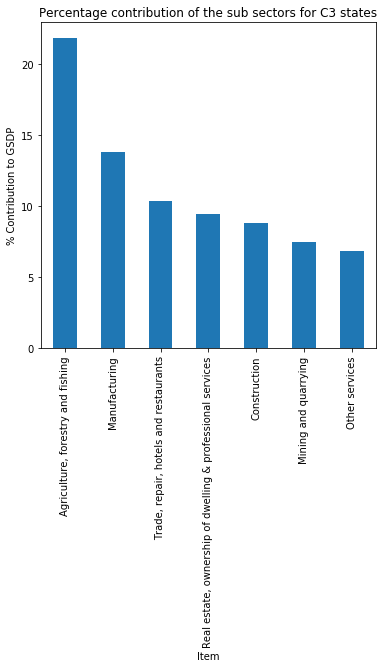

In [71]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C3 category states
df_state_C3['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C3 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C3 category.
1. Agriculture, forestry and fishing
2. Manufacturing
3. Trade, repair, hotels and restaurants
4. Real estate, ownership of dwelling & professional services
5. Construction

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Mining and quarrying
2. Other services

### C4 states

In [72]:
# Creating dataframe for C4 states
# Taking only sub sectors columns and total GSDP
df_state_C4 = df_GSVA_all_states[df_GSVA_all_states['Category']=='C4']
df_state_C4 = df_state_C4[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C4

Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
3,Bihar,7951890,68107.0,2189965,345168,3449763,7448373,3147173,1178022,3740641,2078171,4587589,37391988
26,Uttar_Pradesh,25097754,901501.0,12261649,2030625,11256450,9437243,7404509,3392275,14548185,6152124,5034623,104337115
14,Manipur,383140,NaN,49501,27490,143182,262950,109726,30315,159335,297078,317930,1804276
2,Assam,3855548,1471149.0,2002936,296587,1733568,2987155,1194568,543651,1412466,1373611,1795658,19809800
9,Jharkhand,3211065,2037289.0,4114148,337489,1789834,1991359,1470022,551441,1656784,1088325,1375410,21710718
12,Madhya_Pradesh,16235647,1618373.0,4368833,1272905,4403151,5357515,2865802,1988794,2660123,2497321,2747805,48198169


In [73]:
# Transposing 'df_state_C4'
df_state_C4 = df_state_C4.T
df_state_C4

,3,26,14,2,9,12
Item,,,,,,
State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh
"Agriculture, forestry and fishing",7951890,25097754,383140,3855548,3211065,16235647
Mining and quarrying,68107,901501,NaN,1.47115e+06,2.03729e+06,1.61837e+06
Manufacturing,2189965,12261649,49501,2002936,4114148,4368833
"Electricity, gas, water supply & other utility services",345168,2030625,27490,296587,337489,1272905
Construction,3449763,11256450,143182,1733568,1789834,4403151
"Trade, repair, hotels and restaurants",7448373,9437243,262950,2987155,1991359,5357515
"Transport, storage, communication & services related to broadcasting",3147173,7404509,109726,1194568,1470022,2865802
Financial services,1178022,3392275,30315,543651,551441,1988794


In [74]:
# Creating column header with States name
header = df_state_C4.iloc[0]
df_state_C4 = df_state_C4[1:]
df_state_C4.columns = header
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh
Item,,,,,,
"Agriculture, forestry and fishing",7951890,25097754,383140,3855548,3211065,16235647
Mining and quarrying,68107,901501,NaN,1.47115e+06,2.03729e+06,1.61837e+06
Manufacturing,2189965,12261649,49501,2002936,4114148,4368833
"Electricity, gas, water supply & other utility services",345168,2030625,27490,296587,337489,1272905
Construction,3449763,11256450,143182,1733568,1789834,4403151
"Trade, repair, hotels and restaurants",7448373,9437243,262950,2987155,1991359,5357515
"Transport, storage, communication & services related to broadcasting",3147173,7404509,109726,1194568,1470022,2865802
Financial services,1178022,3392275,30315,543651,551441,1988794
"Real estate, ownership of dwelling & professional services",3740641,14548185,159335,1412466,1656784,2660123


In [75]:
# There is a NaN value for Manipur Mining and quarrying sub sector
# Imputing it to 0
df_state_C4.at['Mining and quarrying','Manipur'] = 0

In [76]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C4['Total'] = df_state_C4['Bihar']+df_state_C4['Uttar_Pradesh']+df_state_C4['Manipur']+df_state_C4['Assam']+df_state_C4['Jharkhand']+df_state_C4['Madhya_Pradesh']
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total
Item,,,,,,,
"Agriculture, forestry and fishing",7951890,25097754,383140,3855548,3211065,16235647,56735044
Mining and quarrying,68107,901501,0,1.47115e+06,2.03729e+06,1.61837e+06,6.09642e+06
Manufacturing,2189965,12261649,49501,2002936,4114148,4368833,24987032
"Electricity, gas, water supply & other utility services",345168,2030625,27490,296587,337489,1272905,4310264
Construction,3449763,11256450,143182,1733568,1789834,4403151,22775948
"Trade, repair, hotels and restaurants",7448373,9437243,262950,2987155,1991359,5357515,27484595
"Transport, storage, communication & services related to broadcasting",3147173,7404509,109726,1194568,1470022,2865802,16191800
Financial services,1178022,3392275,30315,543651,551441,1988794,7684498
"Real estate, ownership of dwelling & professional services",3740641,14548185,159335,1412466,1656784,2660123,24177534


In [77]:
# Converting all the columns data type to numeric
df_state_C4[df_state_C4.columns] = df_state_C4[df_state_C4.columns].apply(pd.to_numeric)

In [78]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C4['% Sub Sector Contribution'] = round(((df_state_C4['Total']/df_state_C4.at['Gross State Domestic Product','Total'])*100),2)
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution
Item,,,,,,,,
"Agriculture, forestry and fishing",7951890,25097754,383140,3855548,3211065,16235647,56735044,24.32
Mining and quarrying,68107,901501,0,1471149,2037289,1618373,6096419,2.61
Manufacturing,2189965,12261649,49501,2002936,4114148,4368833,24987032,10.71
"Electricity, gas, water supply & other utility services",345168,2030625,27490,296587,337489,1272905,4310264,1.85
Construction,3449763,11256450,143182,1733568,1789834,4403151,22775948,9.76
"Trade, repair, hotels and restaurants",7448373,9437243,262950,2987155,1991359,5357515,27484595,11.78
"Transport, storage, communication & services related to broadcasting",3147173,7404509,109726,1194568,1470022,2865802,16191800,6.94
Financial services,1178022,3392275,30315,543651,551441,1988794,7684498,3.29
"Real estate, ownership of dwelling & professional services",3740641,14548185,159335,1412466,1656784,2660123,24177534,10.37


In [79]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C4 = df_state_C4.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C4 = df_state_C4.drop('Gross State Domestic Product')
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution
Item,,,,,,,,
"Agriculture, forestry and fishing",7951890,25097754,383140,3855548,3211065,16235647,56735044,24.32
"Trade, repair, hotels and restaurants",7448373,9437243,262950,2987155,1991359,5357515,27484595,11.78
Manufacturing,2189965,12261649,49501,2002936,4114148,4368833,24987032,10.71
"Real estate, ownership of dwelling & professional services",3740641,14548185,159335,1412466,1656784,2660123,24177534,10.37
Construction,3449763,11256450,143182,1733568,1789834,4403151,22775948,9.76
"Transport, storage, communication & services related to broadcasting",3147173,7404509,109726,1194568,1470022,2865802,16191800,6.94
Other services,4587589,5034623,317930,1795658,1375410,2747805,15859015,6.80
Public administration,2078171,6152124,297078,1373611,1088325,2497321,13486630,5.78
Financial services,1178022,3392275,30315,543651,551441,1988794,7684498,3.29


In [80]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C4['Top 80%'] = df_state_C4['% Sub Sector Contribution'].cumsum()
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,
"Agriculture, forestry and fishing",7951890,25097754,383140,3855548,3211065,16235647,56735044,24.32,24.32
"Trade, repair, hotels and restaurants",7448373,9437243,262950,2987155,1991359,5357515,27484595,11.78,36.10
Manufacturing,2189965,12261649,49501,2002936,4114148,4368833,24987032,10.71,46.81
"Real estate, ownership of dwelling & professional services",3740641,14548185,159335,1412466,1656784,2660123,24177534,10.37,57.18
Construction,3449763,11256450,143182,1733568,1789834,4403151,22775948,9.76,66.94
"Transport, storage, communication & services related to broadcasting",3147173,7404509,109726,1194568,1470022,2865802,16191800,6.94,73.88
Other services,4587589,5034623,317930,1795658,1375410,2747805,15859015,6.80,80.68
Public administration,2078171,6152124,297078,1373611,1088325,2497321,13486630,5.78,86.46
Financial services,1178022,3392275,30315,543651,551441,1988794,7684498,3.29,89.75


In [81]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C4 = df_state_C4[df_state_C4['Top 80%'] < 81]
df_state_C4

State,Bihar,Uttar_Pradesh,Manipur,Assam,Jharkhand,Madhya_Pradesh,Total,% Sub Sector Contribution,Top 80%
Item,,,,,,,,,
"Agriculture, forestry and fishing",7951890,25097754,383140,3855548,3211065,16235647,56735044,24.32,24.32
"Trade, repair, hotels and restaurants",7448373,9437243,262950,2987155,1991359,5357515,27484595,11.78,36.10
Manufacturing,2189965,12261649,49501,2002936,4114148,4368833,24987032,10.71,46.81
"Real estate, ownership of dwelling & professional services",3740641,14548185,159335,1412466,1656784,2660123,24177534,10.37,57.18
Construction,3449763,11256450,143182,1733568,1789834,4403151,22775948,9.76,66.94
"Transport, storage, communication & services related to broadcasting",3147173,7404509,109726,1194568,1470022,2865802,16191800,6.94,73.88
Other services,4587589,5034623,317930,1795658,1375410,2747805,15859015,6.80,80.68


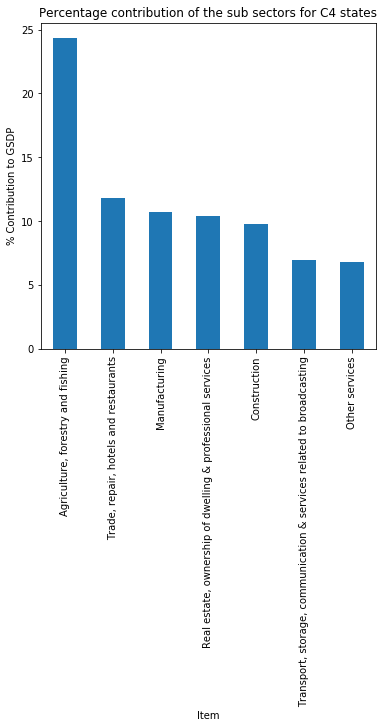

In [82]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C4 category states
df_state_C4['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C4 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C4 category.
1. Agriculture, forestry and fishing
2. Trade, repair, hotels and restaurants
3. Manufacturing
4. Real estate, ownership of dwelling & professional services
5. Construction

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Transport, storage, communication & services related to broadcasting
2. Other services


### Answers
#### How does the GDP distribution of the top states (C1) differ from the others?
1. C1 states total GDP = 101930677
2. C2 states total GDP = 639027294
3. C3 states total GDP = 125319545	
4. C4 states total GDP = 125319545	

We notice that the total GDP of C2 states is the highest, whereas total GDP of C1 states is the lowest.
Because there are only 4 states come under C1 category. Also, though the per capita GDP is higher of these states, the total GDP is lower.

#### Which sub-sectors seem to be correlated with high GDP?
This answer is already mentioned to the end of each category(C1,C2,C3,C4) above at the section `The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C4 category`.

#### Which sub-sectors do the various categories need to focus on? 
This answer is already mentioned to the end of each category(C1,C2,C3,C4) above at the section `Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP`.

#### Recommendations for C1 to improve the per capita GDP
Focus on below sub sectors:-
1. Transport, storage, communication & services related to broadcasting
2. Other services

#### Recommendations for C2 to improve the per capita GDP
Focus on below sub sectors:-
1. Construction
2. Other services
3. Transport, storage, communication & services related to broadcasting

#### Recommendations for C3 to improve the per capita GDP
1. Except Agriculture, forestry and fishing they should foucs on other sub sectors

#### Recommendations for C4 to improve the per capita GDP
1. Except Agriculture, forestry and fishing they should foucs on other sub sectors specifically below sub sectors Transport, storage, communication & services related to broadcasting and Other services.


# Part-II: GDP and Education Dropout Rates

In [83]:
# Reading DropOutRates file
df_dropout_rate = pd.read_csv('DropOutRates.csv')
df_dropout_rate

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.870,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.710,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.110,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.060,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.900,NaN,NaN,NaN
5,6,Chandigarh,NaN,NaN,NaN,0.10,1.08,0.44,NaN,NaN,NaN,13.65,11.28,10.55
6,7,Chhatisgarh,4.14,1.42,2.91,5.42,3.80,5.85,14.86,23.41,21.260,NaN,NaN,2.76
7,8,Dadra & Nagar Haveli,NaN,1.57,1.47,3.38,4.13,4.02,24.41,28.59,16.770,9.65,6.24,9.47
8,9,Daman & Diu,NaN,0.85,1.11,NaN,3.58,3.11,11.52,19.86,32.270,1.26,9.86,40.48
9,10,Delhi,NaN,NaN,NaN,NaN,2.78,0.76,5.32,8.90,11.810,14.47,16.25,17.32


In [84]:
# Filtering only Primary, Upper primary and Secondary education for the year of 2014-15
df_dropout_rate = df_dropout_rate[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]


In [85]:
# Renaming 'Level of Education - State' column to 'State'
df_dropout_rate.rename(columns={'Level of Education - State':'State'},inplace=True)

In [86]:
# Replacing the space in bethween words of the state name with '_'.
# Eg:- 'Uttar Pradesh' to 'Uttar_Pradesh'
# Because in 'df_GSVA_all_states' dataframe all the state names are in this format
# This is for the merging purpose with the key 'State'
df_dropout_rate['State'] = df_dropout_rate['State'].apply(lambda x: x.replace(' ','_'))
df_dropout_rate

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A_&_N_Islands,1.21,1.69,9.870
1,Andhra_Pradesh,4.35,5.20,15.710
2,Arunachal_Pradesh,10.89,6.71,17.110
3,Assam,7.44,10.51,27.060
4,Bihar,2.09,4.08,25.900
5,Chandigarh,NaN,0.44,NaN
6,Chhatisgarh,1.42,5.85,21.260
7,Dadra_&_Nagar_Haveli,1.57,4.02,16.770
8,Daman_&_Diu,0.85,3.11,32.270
9,Delhi,NaN,0.76,11.810


In [87]:
# Renaming 'Chhatisgarh' to 'Chhattisgarh' and 'Uttrakhand' to 'Uttarakhand'
# For merging with key 'State'
df_dropout_rate = df_dropout_rate.replace(to_replace='Chhatisgarh',value='Chhattisgarh')
df_dropout_rate = df_dropout_rate.replace(to_replace='Uttrakhand',value='Uttarakhand')
df_dropout_rate

,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A_&_N_Islands,1.21,1.69,9.870
1,Andhra_Pradesh,4.35,5.20,15.710
2,Arunachal_Pradesh,10.89,6.71,17.110
3,Assam,7.44,10.51,27.060
4,Bihar,2.09,4.08,25.900
5,Chandigarh,NaN,0.44,NaN
6,Chhattisgarh,1.42,5.85,21.260
7,Dadra_&_Nagar_Haveli,1.57,4.02,16.770
8,Daman_&_Diu,0.85,3.11,32.270
9,Delhi,NaN,0.76,11.810


In [88]:
# Left merging df_GSVA_all_states and df_dropout_rate on 'State' key
df_GDP_and_education = pd.merge(df_GSVA_all_states,df_dropout_rate,how='left',on='State')
df_GDP_and_education

,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank,Category,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Bihar,7951890,68107.0,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,1101240,33954,21.45,16.01,59.32,1.0,C4,2.09,4.08,25.90
1,Uttar_Pradesh,25097754,901501.0,25999255,12261649,2030625,11256450,25548724,9437243,7404509,...,2109940,49450,24.92,24.49,44.06,2.0,C4,7.08,2.70,10.22
2,Manipur,383140,NaN,383140,49501,27490,143182,220173,262950,109726,...,30873,58442,21.24,12.20,65.25,3.0,C4,18.00,4.20,14.38
3,Assam,3855548,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,326780,60621,26.89,20.36,46.98,4.0,C4,7.44,10.51,27.06
4,Jharkhand,3211065,2037289.0,5248354,4114148,337489,1789834,6241471,1991359,1470022,...,349660,62091,24.17,28.75,37.46,5.0,C4,6.41,8.99,24.00
5,Madhya_Pradesh,16235647,1618373.0,17854020,4368833,1272905,4403151,10044889,5357515,2865802,...,765180,62989,37.04,20.84,37.59,6.0,C4,10.14,9.20,24.77
6,Odisha,6422978,2586328.0,9009306,5754229,833067,2402396,8989693,3149555,2034016,...,435220,73979,27.98,27.92,38.07,7.0,C3,2.94,3.81,29.56
7,Meghalaya,366521,84529.0,451050,433213,54473,150256,637942,383974,148189,...,32020,76228,18.48,26.14,49.19,8.0,C3,10.34,6.52,20.52
8,Tripura,799825,142391.0,942216,228625,77870,177899,484393,390423,155956,...,38350,77358,31.76,16.33,50.05,9.0,C3,3.58,1.99,28.42
9,Rajasthan,15044394,4069385.0,19113780,6552580,1122888,5353326,13028794,7297290,3814461,...,721610,84837,31.22,21.28,42.50,10.0,C3,8.39,3.07,13.48


In [89]:
# Sorting by='Per Capita GSDP (Rs.)'
df_GDP_and_education = df_GDP_and_education.sort_values(by='Per Capita GSDP (Rs.)')
df_GDP_and_education

,State,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",...,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank,Category,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Bihar,7951890,68107.0,8019997,2189965,345168,3449763,5984896,7448373,3147173,...,1101240,33954,21.45,16.01,59.32,1.0,C4,2.09,4.08,25.90
1,Uttar_Pradesh,25097754,901501.0,25999255,12261649,2030625,11256450,25548724,9437243,7404509,...,2109940,49450,24.92,24.49,44.06,2.0,C4,7.08,2.70,10.22
2,Manipur,383140,NaN,383140,49501,27490,143182,220173,262950,109726,...,30873,58442,21.24,12.20,65.25,3.0,C4,18.00,4.20,14.38
3,Assam,3855548,1471149.0,5326697,2002936,296587,1733568,4033091,2987155,1194568,...,326780,60621,26.89,20.36,46.98,4.0,C4,7.44,10.51,27.06
4,Jharkhand,3211065,2037289.0,5248354,4114148,337489,1789834,6241471,1991359,1470022,...,349660,62091,24.17,28.75,37.46,5.0,C4,6.41,8.99,24.00
5,Madhya_Pradesh,16235647,1618373.0,17854020,4368833,1272905,4403151,10044889,5357515,2865802,...,765180,62989,37.04,20.84,37.59,6.0,C4,10.14,9.20,24.77
6,Odisha,6422978,2586328.0,9009306,5754229,833067,2402396,8989693,3149555,2034016,...,435220,73979,27.98,27.92,38.07,7.0,C3,2.94,3.81,29.56
7,Meghalaya,366521,84529.0,451050,433213,54473,150256,637942,383974,148189,...,32020,76228,18.48,26.14,49.19,8.0,C3,10.34,6.52,20.52
8,Tripura,799825,142391.0,942216,228625,77870,177899,484393,390423,155956,...,38350,77358,31.76,16.33,50.05,9.0,C3,3.58,1.99,28.42
9,Rajasthan,15044394,4069385.0,19113780,6552580,1122888,5353326,13028794,7297290,3814461,...,721610,84837,31.22,21.28,42.50,10.0,C3,8.39,3.07,13.48


In [90]:
# Converting required columns to nemeric
col_list = ['Primary','Secondary','Tertiary','Population','Per Capita GSDP (Rs.)','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']
df_GDP_and_education[col_list] = df_GDP_and_education[col_list].apply(pd.to_numeric)

#### Sactter plot for GDP per capita with `Primary` dropout rates

posx and posy should be finite values
posx and posy should be finite values


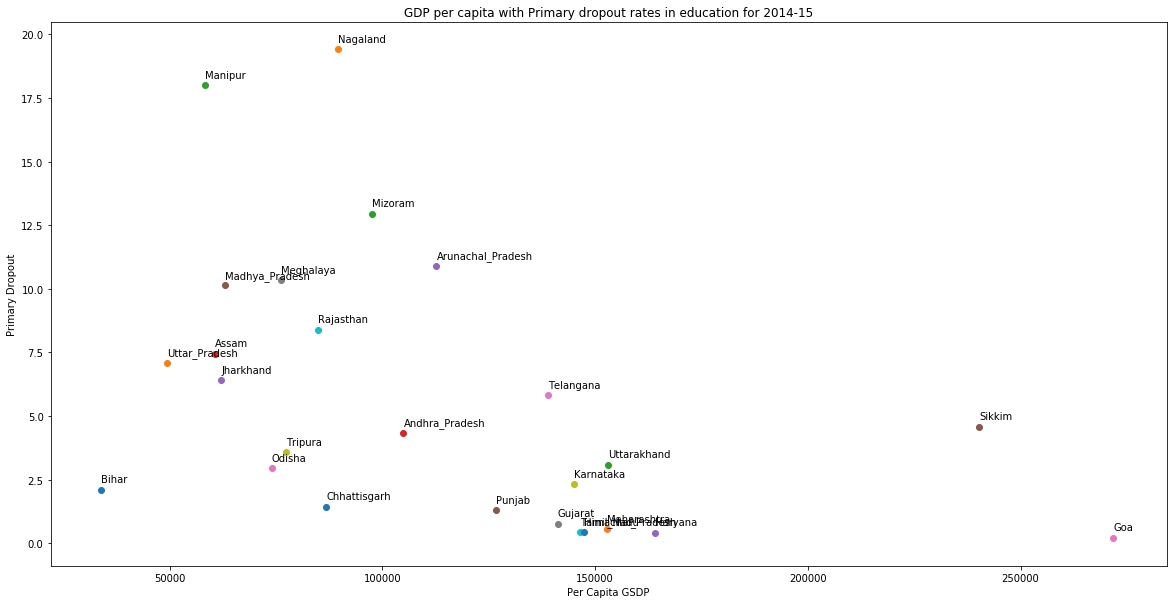

In [91]:
plt.figure(figsize=(20,10))
for i,states in enumerate(df_GDP_and_education['State'].tolist()):
    x = df_GDP_and_education['Per Capita GSDP (Rs.)'].tolist()[i]
    y = df_GDP_and_education['Primary - 2014-2015'].tolist()[i]
    plt.scatter(x, y)
    plt.text(x+.3, y+.3, states)
plt.ylabel('Primary Dropout')
plt.xlabel('Per Capita GSDP')
plt.title('GDP per capita with Primary dropout rates in education for 2014-15')
plt.show()

#### Sactter plot for GDP per capita with `Upper Primary` dropout rates

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


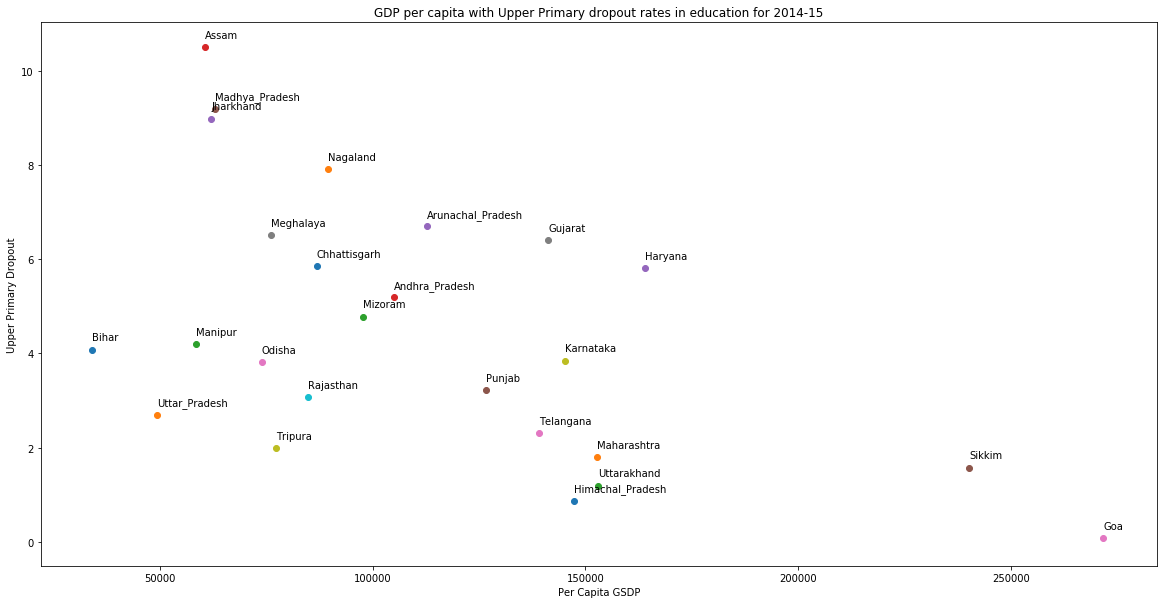

In [92]:
plt.figure(figsize=(20,10))
for i,states in enumerate(df_GDP_and_education['State'].tolist()):
    x = df_GDP_and_education['Per Capita GSDP (Rs.)'].tolist()[i]
    y = df_GDP_and_education['Upper Primary - 2014-2015'].tolist()[i]
    plt.scatter(x, y)
    plt.text(x+.2, y+.2, states)
plt.ylabel('Upper Primary Dropout')
plt.xlabel('Per Capita GSDP')
plt.title('GDP per capita with Upper Primary dropout rates in education for 2014-15')
plt.show()

#### Sactter plot for GDP per capita with `Secondary` dropout rates

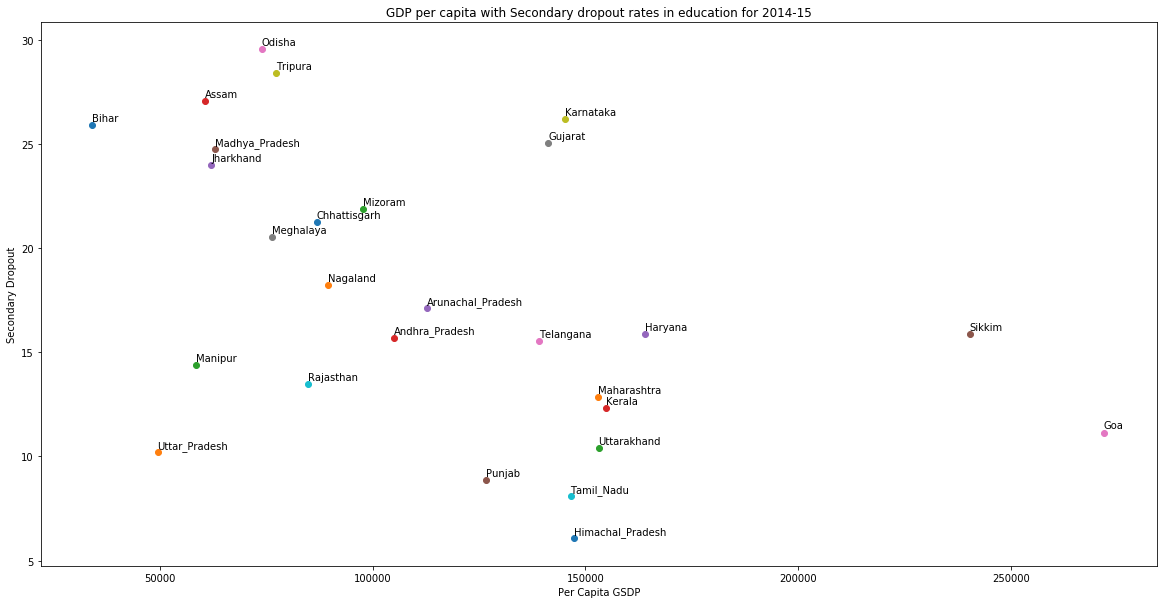

In [93]:
plt.figure(figsize=(20,10))
for i,states in enumerate(df_GDP_and_education['State'].tolist()):
    x = df_GDP_and_education['Per Capita GSDP (Rs.)'].tolist()[i]
    y = df_GDP_and_education['Secondary - 2014-2015'].tolist()[i]
    plt.scatter(x, y)
    plt.text(x+.2, y+.2, states)
plt.ylabel('Secondary Dropout')
plt.xlabel('Per Capita GSDP')
plt.title('GDP per capita with Secondary dropout rates in education for 2014-15')
plt.show()

### Analysis
We can see that the drop out rates are `negatively correlated` with the per capita GDP of the states
The higher the per capita GDP, the lower the dropout rates in Primary, Upper primary and Secondary education.

##### Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

In [94]:
# Creating dataframe with sector wise GDP contribution and drop out rates
df_dropout_sector = df_GDP_and_education[['State','Primary','Secondary','Tertiary','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df_dropout_sector

,State,Primary,Secondary,Tertiary,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Bihar,8019997,5984896,22179969,2.09,4.08,25.90
1,Uttar_Pradesh,25999255,25548724,45968959,7.08,2.70,10.22
2,Manipur,383140,220173,1177334,18.00,4.20,14.38
3,Assam,5326697,4033091,9307109,7.44,10.51,27.06
4,Jharkhand,5248354,6241471,8133341,6.41,8.99,24.00
5,Madhya_Pradesh,17854020,10044889,18117360,10.14,9.20,24.77
6,Odisha,9009306,8989693,12256258,2.94,3.81,29.56
7,Meghalaya,451050,637942,1200655,10.34,6.52,20.52
8,Tripura,942216,484393,1484709,3.58,1.99,28.42
9,Rajasthan,19113780,13028794,26015812,8.39,3.07,13.48


In [95]:
# Correlation matrix 
df_dropout_sector.corr(method='pearson')

,Primary,Secondary,Tertiary,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
Primary,1.000000,0.787677,0.792266,-0.272991,0.011054,-0.085800
Secondary,0.787677,1.000000,0.932177,-0.449568,-0.129844,-0.180270
Tertiary,0.792266,0.932177,1.000000,-0.392188,-0.182172,-0.189075
Primary - 2014-2015,-0.272991,-0.449568,-0.392188,1.000000,0.437074,0.126865
Upper Primary - 2014-2015,0.011054,-0.129844,-0.182172,0.437074,1.000000,0.549114
Secondary - 2014-2015,-0.085800,-0.180270,-0.189075,0.126865,0.549114,1.000000


#### Analysis from the above matrix
1. Primary dropout rates is negatively correlated with every sectors. Specifically with the Secondary and Tertiary sectors. That means the more primary dropout rates the lesser contribution from Secondary and Tertiary sectors into the GDP.
2. Upper Primary dropout rates are barely correlated with any sectors. Though it is little negatively correlated with Secondary and Tertiary sectors.
3. The Secondary dropout rates are slightly negatively correlated with every sectors.

#### Correlation between population and dropout rates

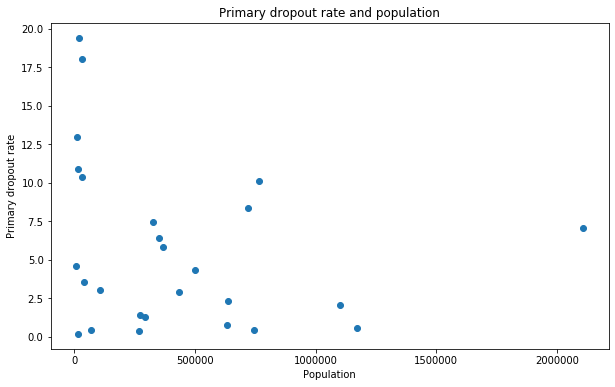

In [96]:
# Scatter plot for Primary dropout rate and population
plt.figure(figsize=(10,6))
plt.scatter(x=df_GDP_and_education['Population'],y=df_GDP_and_education['Primary - 2014-2015'])
plt.ylabel('Primary dropout rate')
plt.xlabel('Population')
plt.title('Primary dropout rate and population')
plt.show()

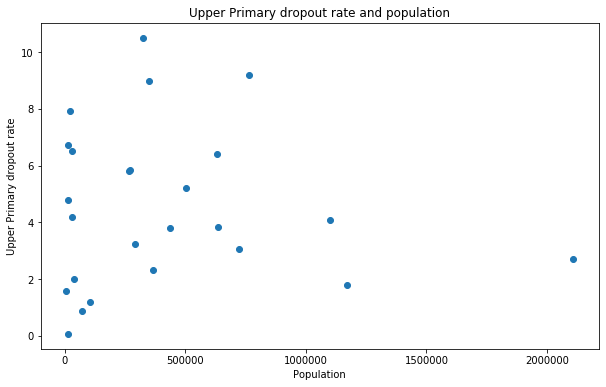

In [97]:
# Scatter plot for Upper Primary dropout rate and population
plt.figure(figsize=(10,6))
plt.scatter(x=df_GDP_and_education['Population'],y=df_GDP_and_education['Upper Primary - 2014-2015'])
plt.ylabel('Upper Primary dropout rate')
plt.xlabel('Population')
plt.title('Upper Primary dropout rate and population')
plt.show()

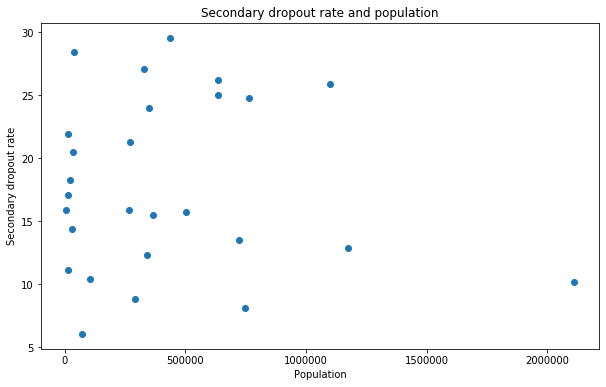

In [98]:
# Scatter plot for Secondary Primary dropout rate and population
plt.figure(figsize=(10,6))
plt.scatter(x=df_GDP_and_education['Population'],y=df_GDP_and_education['Secondary - 2014-2015'])
plt.ylabel('Secondary dropout rate')
plt.xlabel('Population')
plt.title('Secondary dropout rate and population')
plt.show()